# **Competition Details**
**Link to competition**: *https://www.kaggle.com/competitions/kaggle-survey-2022*

## Main Data:
* kaggle_survey_2022_responses.csv: 43 questions and 23,997 responses
    - Responses to multiple choice questions (only a single choice can be selected) were recorded in individual columns. Responses to multiple selection questions (multiple choices can be selected) were split into multiple columns (with one column per answer choice).

In [1]:
import warnings
warnings.filterwarnings('ignore')

# **Data Pre-Processing**: Getting the Data for Visualization

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('kaggle_survey_2022_responses.csv')
print(np.shape(dataset))

(23998, 296)


In [4]:
print(dataset.isna().sum())

Duration (in seconds)        0
Q2                           0
Q3                           0
Q4                           0
Q5                           0
                         ...  
Q44_8                    16231
Q44_9                    20193
Q44_10                   22271
Q44_11                   23997
Q44_12                   23162
Length: 296, dtype: int64


In [5]:
print(dataset.isna().sum().sum())

6278219


In [6]:
print(dataset.columns)

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)


In [7]:
print(dataset.columns[5:])

Index(['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9',
       'Q6_10',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=291)


In [8]:
print(dataset.columns[5:].to_list())

['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q8', 'Q9', 'Q10_1', 'Q10_2', 'Q10_3', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_

In [9]:
print(dataset.iloc[0,0])
questions = {}
i = 0
for cols in dataset.columns:
    questions[cols] = dataset.iloc[0,i]
    i += 1
# print(questions)

Duration (in seconds)


In [10]:
# print(questions)

In [11]:
dataset = dataset[1:]

In [12]:
print(np.shape(dataset))

(23997, 296)


In [13]:
print(dataset.head())

  Duration (in seconds)     Q2   Q3       Q4   Q5      Q6_1 Q6_2  \
1                   121  30-34  Man    India   No       NaN  NaN   
2                   462  30-34  Man  Algeria   No       NaN  NaN   
3                   293  18-21  Man    Egypt  Yes  Coursera  edX   
4                   851  55-59  Man   France   No  Coursera  NaN   
5                   232  45-49  Man    India  Yes       NaN  NaN   

                   Q6_3      Q6_4 Q6_5  ... Q44_3  \
1                   NaN       NaN  NaN  ...   NaN   
2                   NaN       NaN  NaN  ...   NaN   
3                   NaN  DataCamp  NaN  ...   NaN   
4  Kaggle Learn Courses       NaN  NaN  ...   NaN   
5                   NaN       NaN  NaN  ...   NaN   

                             Q44_4  \
1                              NaN   
2                              NaN   
3  Kaggle (notebooks, forums, etc)   
4  Kaggle (notebooks, forums, etc)   
5                              NaN   

                                           

In [14]:
dataset['Q5'].fillna('Unanswered', inplace=True)
dataset.loc[:,'Q8':'Q9'].fillna('Unanswered', inplace=True)
dataset['Q11'].fillna('None', inplace=True)
dataset['Q16'].fillna('None', inplace=True)
dataset.loc[:,'Q22':'Q27'].fillna('Unanswered', inplace=True)
dataset.loc[:,'Q29':'Q30'].fillna('None', inplace=True)
dataset['Q32'].fillna('None', inplace=True)
dataset['Q43'].fillna('Unanswered', inplace=True)
dataset.fillna(0, inplace=True)
dataset.loc[:,'Q6_1':'Q7_7'] = dataset.loc[:,'Q6_1':'Q7_7'].astype('bool').astype('int')
dataset.loc[:,'Q10_1':'Q10_3'] = dataset.loc[:,'Q10_1':'Q10_3'].astype('bool').astype('int')
dataset.loc[:,'Q12_1':'Q15_15'] = dataset.loc[:,'Q12_1':'Q15_15'].astype('bool').astype('int')
dataset.loc[:,'Q17_1':'Q21_10'] = dataset.loc[:,'Q17_1':'Q21_10'].astype('bool').astype('int')
dataset.loc[:,'Q28_1':'Q28_8'] = dataset.loc[:,'Q28_1':'Q28_8'].astype('bool').astype('int')
dataset.loc[:,'Q31_1':'Q31_12'] = dataset.loc[:,'Q31_1':'Q31_12'].astype('bool').astype('int')
dataset.loc[:,'Q33_1':'Q42_9'] = dataset.loc[:,'Q33_1':'Q42_9'].astype('bool').astype('int')
dataset.loc[:,'Q44_1':] = dataset.loc[:,'Q44_1':].astype('bool').astype('int')

In [15]:
print(dataset.head())

  Duration (in seconds)     Q2   Q3       Q4   Q5 Q6_1 Q6_2 Q6_3 Q6_4 Q6_5  \
1                   121  30-34  Man    India   No    0    0    0    0    0   
2                   462  30-34  Man  Algeria   No    0    0    0    0    0   
3                   293  18-21  Man    Egypt  Yes    1    1    0    1    0   
4                   851  55-59  Man   France   No    1    0    1    0    0   
5                   232  45-49  Man    India  Yes    0    0    0    0    0   

   ... Q44_3 Q44_4 Q44_5 Q44_6 Q44_7  Q44_8 Q44_9 Q44_10 Q44_11 Q44_12  
1  ...     0     0     0     0     0      0     0      0      0      0  
2  ...     0     0     0     0     0      0     0      0      0      0  
3  ...     0     1     0     1     1      0     0      0      0      0  
4  ...     0     1     1     0     0      1     0      0      0      0  
5  ...     0     0     0     0     0      1     0      0      0      0  

[5 rows x 296 columns]


# **Data Visualization**: Get Insights on the Dataset

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

## Age Group of Participants
Question: **What is your age (# years)?**
> (Answer: column contains list of values)

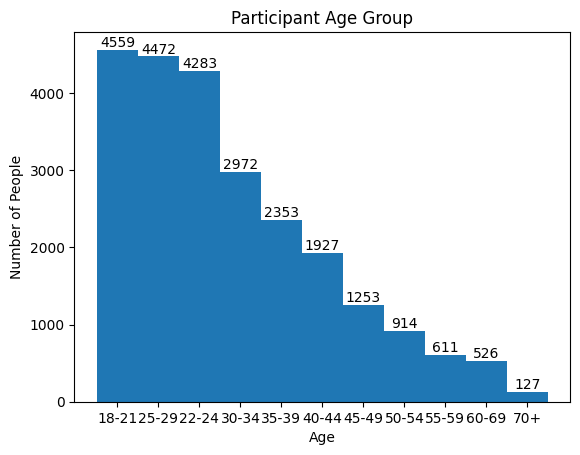

In [17]:
fig, ax = plt.subplots()
bars = ax.bar(dataset['Q2'].value_counts().keys(), dataset['Q2'].value_counts(), width=1)
ax.bar_label(bars)
plt.title('Participant Age Group')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

In [18]:
print(dataset['Q2'].value_counts())

Q2
18-21    4559
25-29    4472
22-24    4283
30-34    2972
35-39    2353
40-44    1927
45-49    1253
50-54     914
55-59     611
60-69     526
70+       127
Name: count, dtype: int64


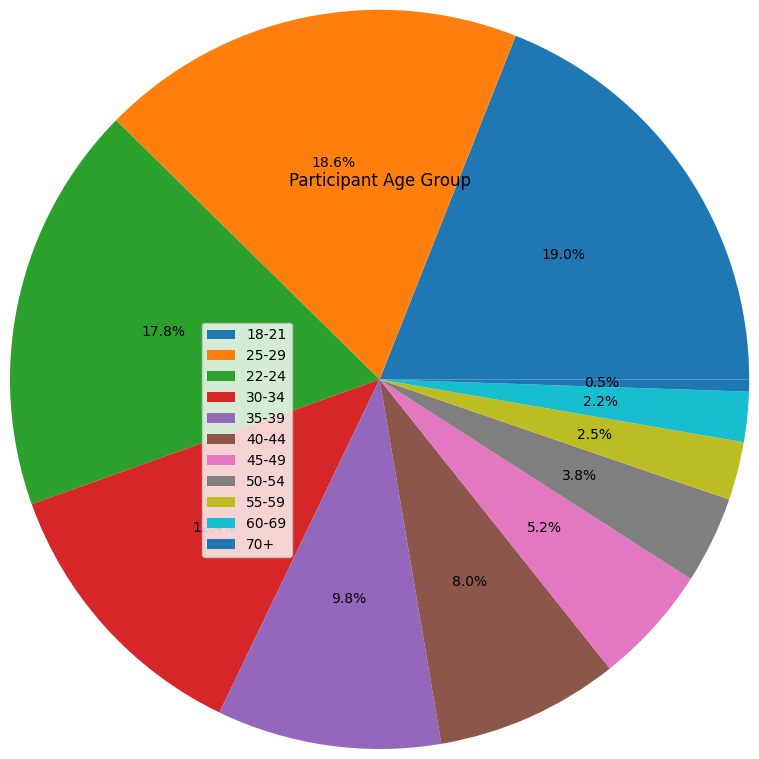

In [19]:
plt.pie(dataset['Q2'].value_counts(), autopct="%1.1f%%", radius=2.5)
plt.legend(labels=dataset['Q2'].value_counts().keys())
plt.title('Participant Age Group')
plt.show()

## Participant Gender Ratio
Question: **What is your gender?**
> Answer Options:
> * Man
> * Woman
> * Nonbinary
> * Prefer not to say
> * Prefer to self-describe

In [20]:
print(dataset['Q3'].value_counts())

Q3
Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: count, dtype: int64


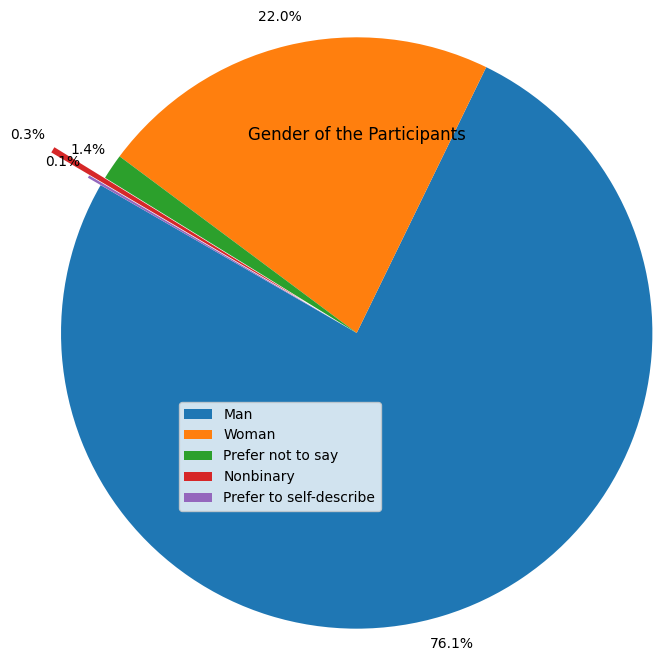

In [21]:
plt.pie(dataset['Q3'].value_counts(), autopct="%1.1f%%", radius=2, explode=[0,0,0,0.4,0.1], startangle=150, pctdistance=1.1)
plt.legend(labels=dataset['Q3'].value_counts().keys())
plt.title('Gender of the Participants')
plt.show()

## Participant Country of Residence
Question: **In which country do you currently reside?**
> Answer: (column contains list of values)

In [22]:
dataset["Q4"].value_counts()

Q4
India                                                   8792
United States of America                                2920
Other                                                   1430
Brazil                                                   833
Nigeria                                                  731
Pakistan                                                 620
Japan                                                    556
China                                                    453
Egypt                                                    383
Mexico                                                   380
Indonesia                                                376
Turkey                                                   345
Russia                                                   324
South Korea                                              317
France                                                   262
United Kingdom of Great Britain and Northern Ireland     258
Spain                

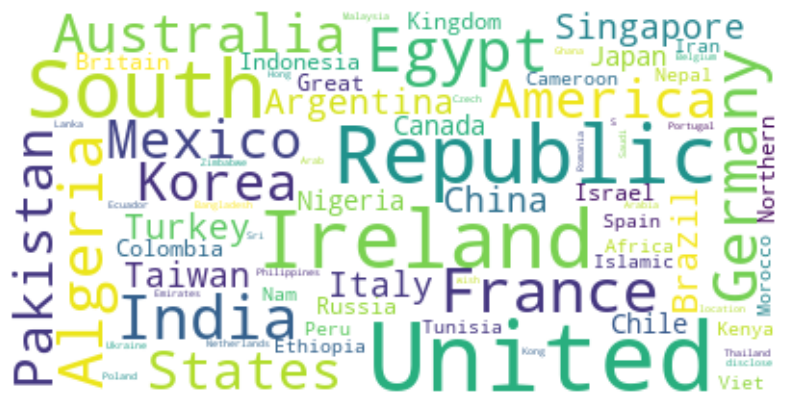

In [23]:
from wordcloud import WordCloud
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(dataset['Q4'].unique()))

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear')
plt.show()

In [24]:
fig = px.choropleth(pd.DataFrame({'Country':dataset["Q4"].value_counts().keys(), 'Number of Kagglers':dataset["Q4"].value_counts().values}), locations='Country', color='Number of Kagglers', hover_name='Country', locationmode='country names')
fig.show()

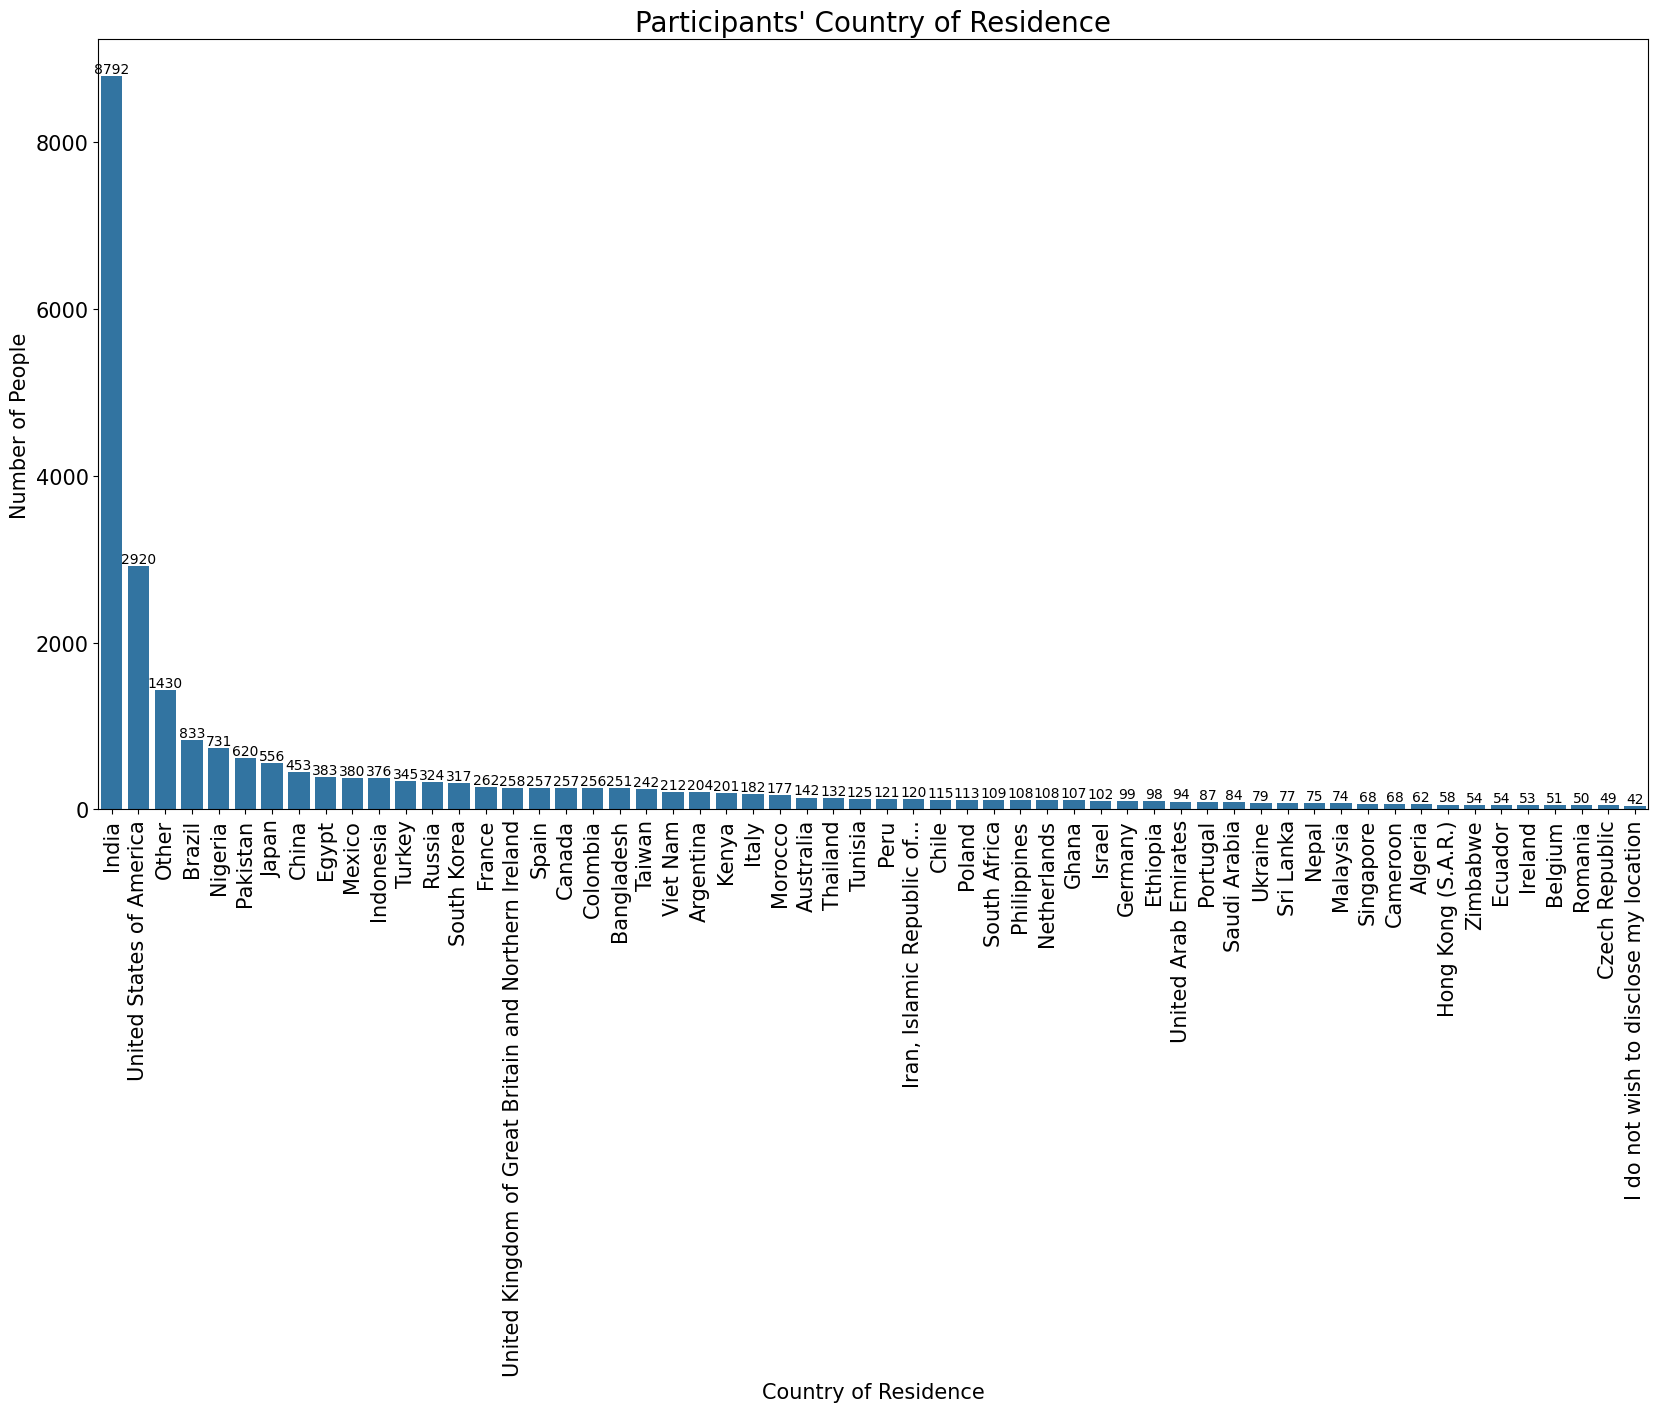

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
barplot = sns.barplot(x=dataset['Q4'].value_counts().keys(), y=dataset['Q4'].value_counts())
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Participants' Country of Residence", fontsize=20)
plt.xlabel('Country of Residence', fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.show()

In [26]:
df1=dataset.groupby('Q4',as_index=False)[['Q3']].count().sort_values(by='Q3',ascending=False).reset_index(drop=True)
df1['Country']=df1['Q4']
df1['Count']=df1['Q3']
df1.drop(columns=['Q3','Q4'],inplace=True)
df1.drop(2,inplace=True)
df1.reset_index(drop=True,inplace=True)
con=['europe', 'asia', 'africa', 'north america','south america']
for i in con:
    fig=px.choropleth(df1,locations='Country',locationmode='country names',color='Count',hover_name='Country',hover_data=['Count'],template='ggplot2',color_continuous_scale=px.colors.sequential.Plasma,scope=i,title='<b>Kagglers in <b>'+i)
    fig.update_layout( geo_bgcolor='#FFF8DC', paper_bgcolor='#FFF8DC')
    fig.show()

## Participant current education status
Question: **Are you currently a student? (high school, university, or graduate)**
> Answer Options:
> * Yes
> * No

In [27]:
print(dataset['Q5'].value_counts())

Q5
No     12036
Yes    11961
Name: count, dtype: int64


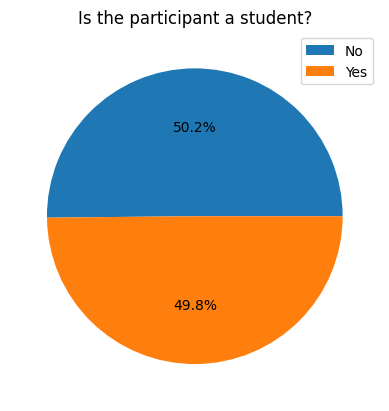

In [28]:
plt.pie(dataset['Q5'].value_counts(), autopct="%1.1f%%")
plt.legend(labels=dataset['Q5'].value_counts().keys())
plt.title('Is the participant a student?', loc="center")
plt.show()

## Participant Completion Track for Completion of Data Science Courses
Question: **On which platforms have you begun or completed data science courses? (Select all that apply)**
> Answer Options:
> * Coursera
> * edX
> * Kaggle Learn Courses
> * DataCamp
> * Fast.ai
> * Udacity
> * Udemy
> * LinkedIn Learning
> * Cloud-certification programs (direct from AWS, Azure, GCP, or similar)
> * University Courses (resulting in a university degree)
> * None
> * Other


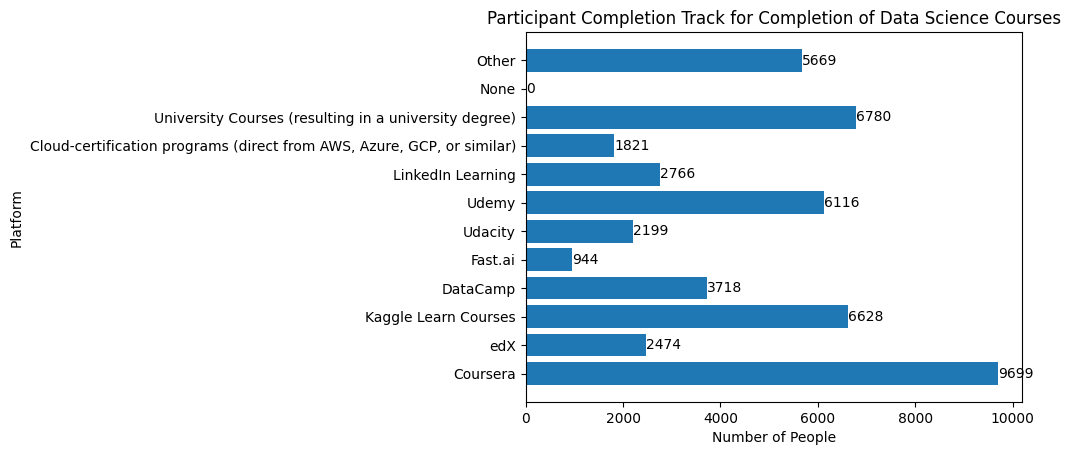

In [29]:
Q6x_vals = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)', 'University Courses (resulting in a university degree)', 'None', 'Other']
Q6y_vals = []
for c in dataset.columns[5:17]:
    Q6y_vals.append(dataset[c].sum())
fig, ax = plt.subplots()
ind = np.arange(len(Q6y_vals))
bars = ax.barh(Q6x_vals, Q6y_vals)
ax.bar_label(bars)
plt.title('Participant Completion Track for Completion of Data Science Courses')
plt.ylabel('Platform')
plt.xlabel('Number of People')
plt.show()

## Highest Level of Study of Participants
Question: **What is the highest level of formal education that you have attained or plan to attain within the next 2 years?**
> Answer Options:
> * No formal education past high school
> * Some college/university study without earning a bachelor’s degree
> * Bachelor’s degree
> * Master’s degree
> * Doctoral degree
> * Professional doctorate
> * I prefer not to answer


In [30]:
print(dataset['Q8'].value_counts())

Q8
Master’s degree                                                      9142
Bachelor’s degree                                                    7625
Doctoral degree                                                      2657
Some college/university study without earning a bachelor’s degree    1431
I prefer not to answer                                               1394
Unanswered                                                            599
Professional doctorate                                                585
No formal education past high school                                  564
Name: count, dtype: int64


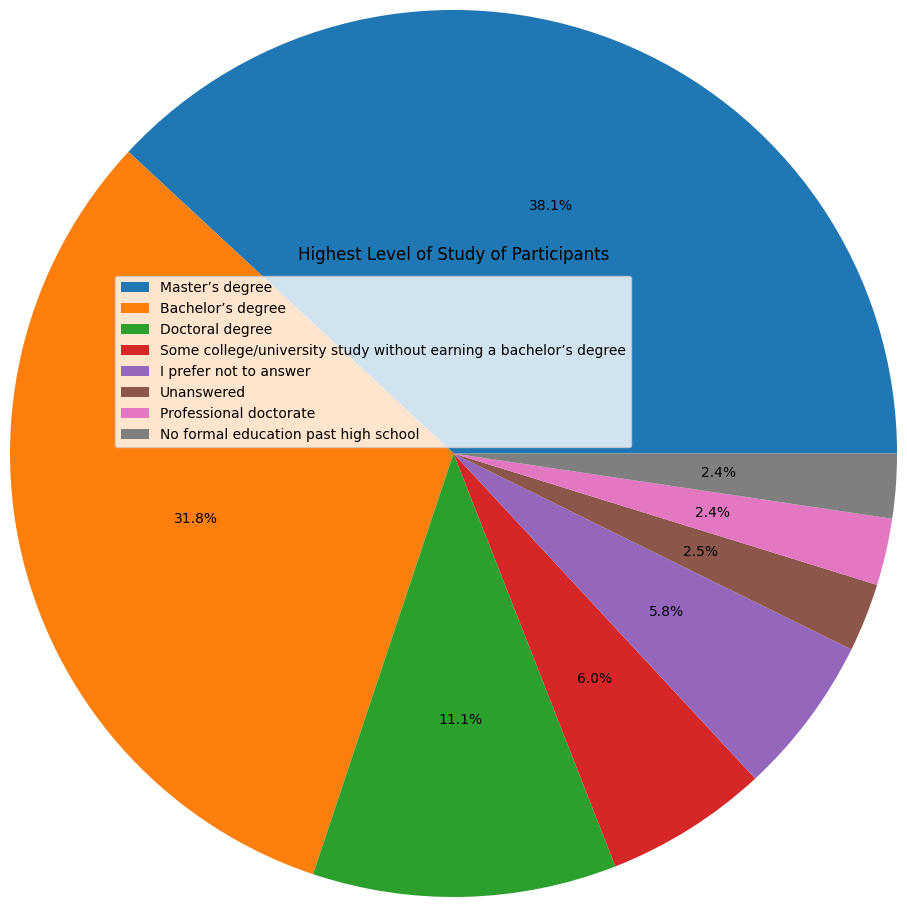

In [31]:
plt.pie(dataset['Q8'].value_counts(), autopct="%1.1f%%", radius=3)
plt.legend(labels=dataset['Q8'].value_counts().keys())
plt.title('Highest Level of Study of Participants')
plt.show()

## Involvement of the Participants in Academic Research Work
Question: **Have you ever published any academic research (papers, preprints, conference proceedings, etc)?**
> Answer Options:
> * Yes
> * No

In [32]:
print(dataset['Q9'].value_counts())

Q9
Unanswered    11636
No             7117
Yes            5244
Name: count, dtype: int64


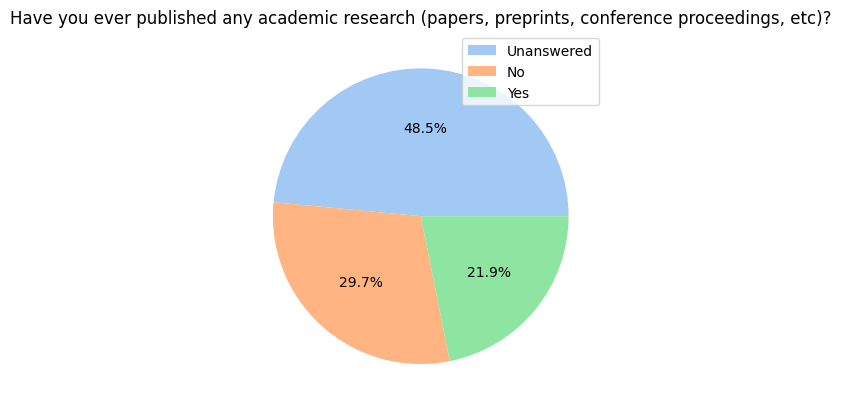

In [33]:
plt.pie(dataset['Q9'].value_counts(), autopct="%1.1f%%", colors=sns.color_palette('pastel')[:dataset['Q9'].value_counts().count()])
plt.legend(labels=dataset['Q9'].value_counts().keys())
plt.title(questions['Q9'], loc="center")
plt.show()

## Involvement of the Participants in Research Work in the field of Machine Learning
Question: **Did your research make use of machine learning? (select multiple)**
> Answer Options:
> * Yes, the research made advances related to some novel machine learning method (theoretical research)
> * Yes, the research made use of machine learning as a tool (applied research)
> * No


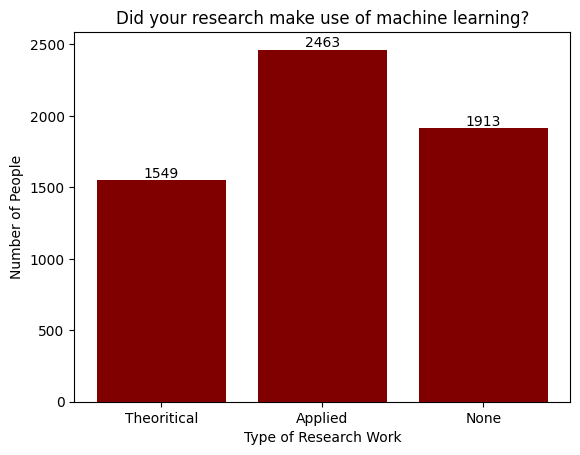

In [34]:
Q10x_vals = ['Theoritical', 'Applied', 'None']
Q10y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q10_1'):dataset.columns.get_loc('Q11')]:
    Q10y_vals.append(dataset[c].sum())
q10fig, q10ax = plt.subplots()
q10bars = q10ax.bar(Q10x_vals, Q10y_vals, color='maroon')
q10ax.bar_label(q10bars)
plt.title(questions['Q10_1'].replace(' - Yes, the research made advances related to some novel machine learning method (theoretical research)', ''))
plt.xlabel('Type of Research Work')
plt.ylabel('Number of People')
plt.show()

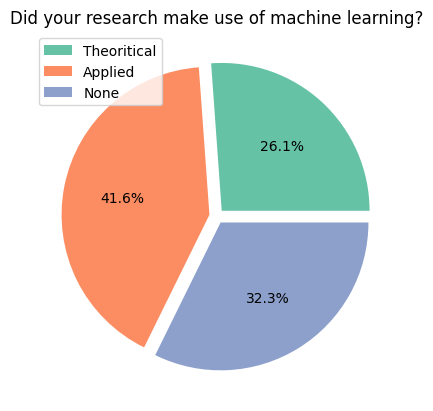

In [35]:
q10data = {}
for value in range(len(Q10x_vals)):
    q10data[Q10x_vals[value]] = Q10y_vals[value]
plt.pie(q10data.values(), autopct="%1.1f%%", colors=sns.color_palette('Set2')[:len(Q10x_vals)], explode=[0.05 for i in range(0,len(Q10x_vals),1)])
plt.legend(labels=Q10x_vals)
plt.title(questions['Q10_1'].replace(' - Yes, the research made advances related to some novel machine learning method (theoretical research)', ''))
plt.show()

In [36]:
research = ['Yes','Yes','No']
q10fig = px.sunburst(pd.DataFrame({'Research':research,'Type':Q10x_vals,'Count':Q10y_vals}), path = ['Research','Type','Count'], color='Research', color_discrete_sequence=['#6A5ACD','#F4A460'], template='simple_white', title='<b>Did the Research make use of Machine Learning?')
q10fig.update_layout(title_x = 0.5)
q10fig.update_traces(marker = dict(line=dict(color='#000000', width=1.6)))
q10fig.update_layout( plot_bgcolor = '#D3D3D3', paper_bgcolor = '#D3D3D3')
q10fig.show()

## Coding Experience of Participants
Question: **For how many years have you been writing code and/or programming?**
> Answer Options:
> * I have never written code
> * < 1 years
> * 1-2 years
> * 3-5 years
> * 5-10 years
> * 10-20 years
> * 20+ years


In [37]:
print(dataset['Q11'].value_counts())

Q11
1-3 years                    6459
< 1 years                    5454
3-5 years                    3399
5-10 years                   2556
I have never written code    2037
10-20 years                  1801
20+ years                    1537
None                          754
Name: count, dtype: int64


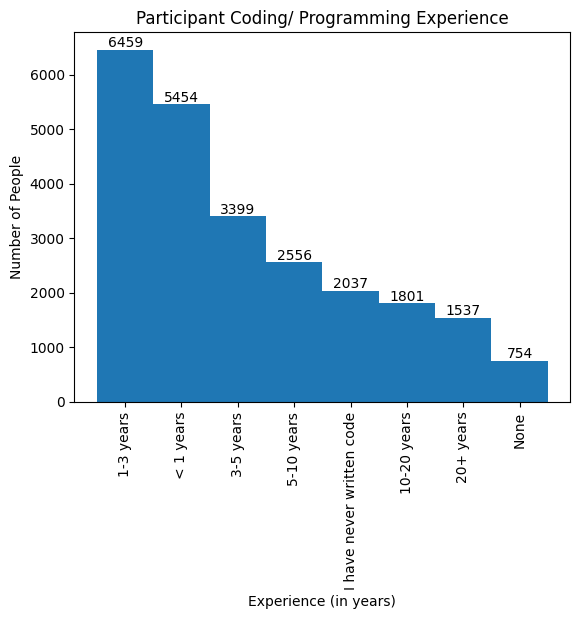

In [38]:
fig, ax = plt.subplots()
bars = ax.bar(dataset['Q11'].value_counts().keys(), dataset['Q11'].value_counts(), width=1, )
ax.bar_label(bars)
plt.title('Participant Coding/ Programming Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()

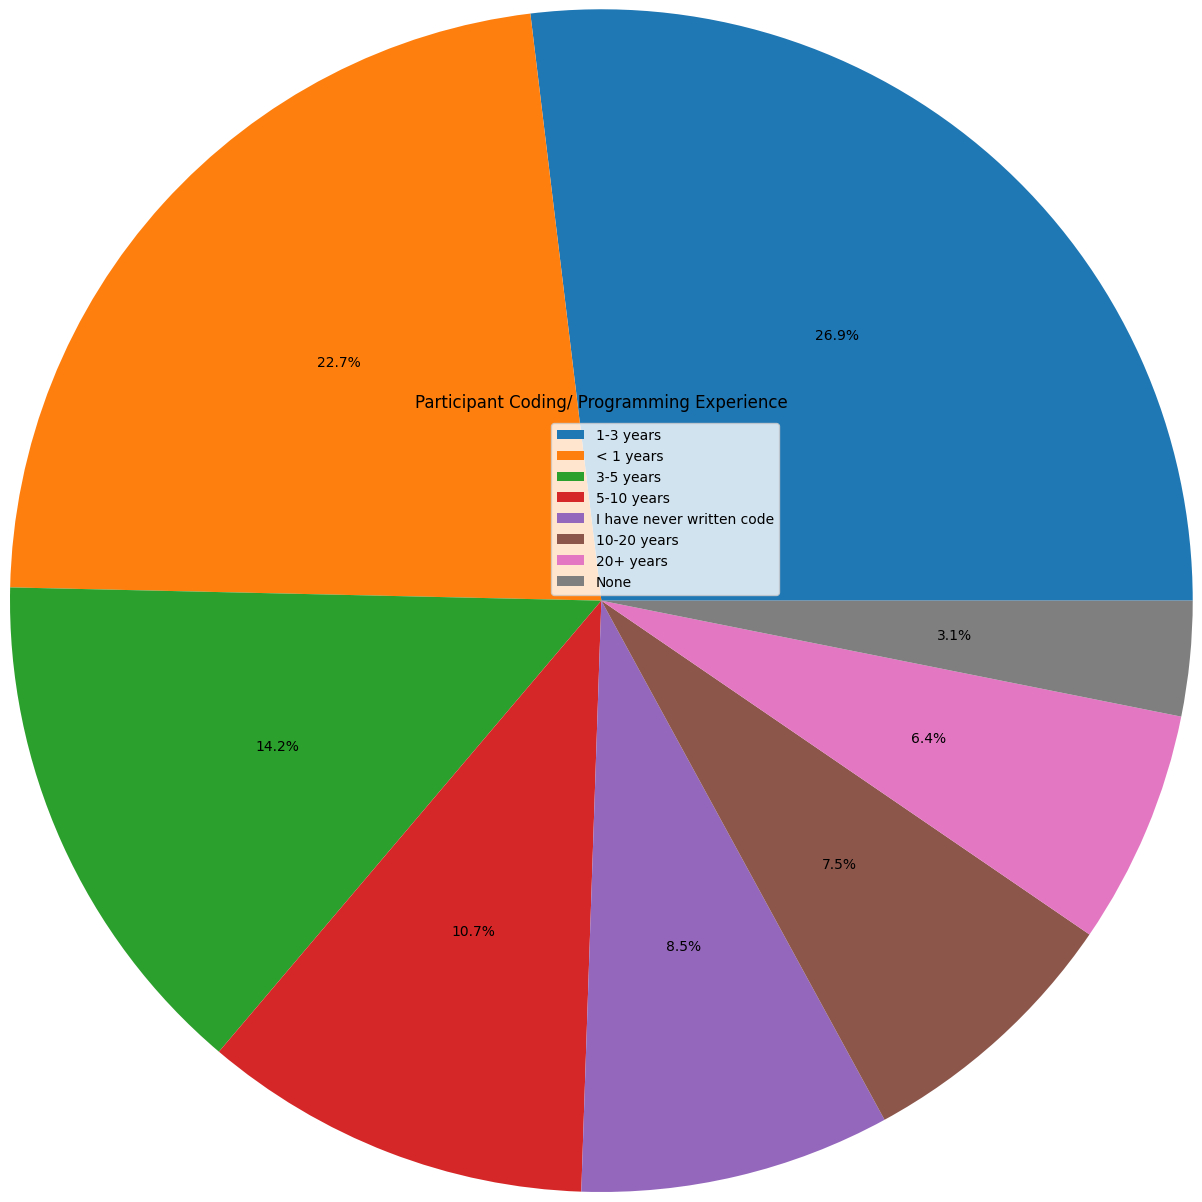

In [39]:
plt.pie(dataset['Q11'].value_counts(), autopct="%1.1f%%", radius=4)
plt.legend(labels=dataset['Q11'].value_counts().keys())
plt.title('Participant Coding/ Programming Experience')
plt.show()

## Knowledge of Programming Languages Among Participants
Questions: **What programming languages do you use on a regular basis? (Select all that apply)**
> Answer Options:
> * Python
> * R
> * SQL
> * C
> * C++
> * Java
> * Javascript
> * Julia
> * Bash
> * MATLAB
> * None
> * Other
> * C#
> * PHP
> * Go

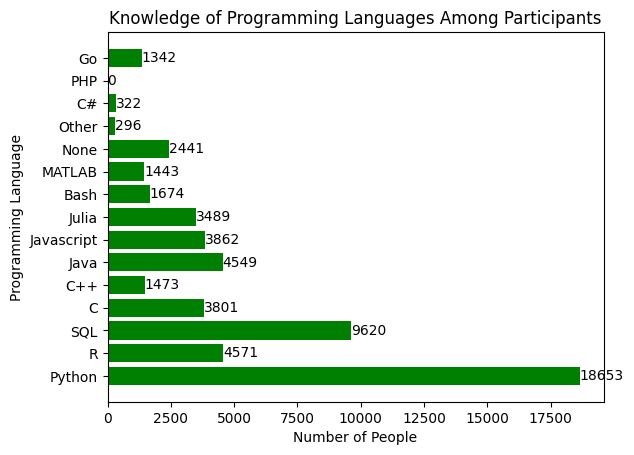

In [40]:
Q12x_vals = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Bash', 'MATLAB', 'None', 'Other', 'C#', 'PHP', 'Go']
Q12y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q12_1'):dataset.columns.get_loc('Q13_1')]:
    Q12y_vals.append(dataset[c].sum())
q12fig, q12ax = plt.subplots()
q12bars = q12ax.barh(Q12x_vals, Q12y_vals, color='green')
q12ax.bar_label(q12bars)
plt.title('Knowledge of Programming Languages Among Participants')
plt.ylabel('Programming Language')
plt.xlabel('Number of People')
plt.show()

## Preferred IDE of the Participants
Question: **Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply)**
> Answer Options:
> * JupyterLab
> * RStudio / Posit
> * Visual Studio
> * Visual Studio Code (VSCode)
> * PyCharm
> * Spyder
> * Notepad++
> * Sublime Text
> * Vim, Emacs, or similar
> * MATLAB
> * Jupyter Notebook
> * IntelliJ
> * None
> * Other

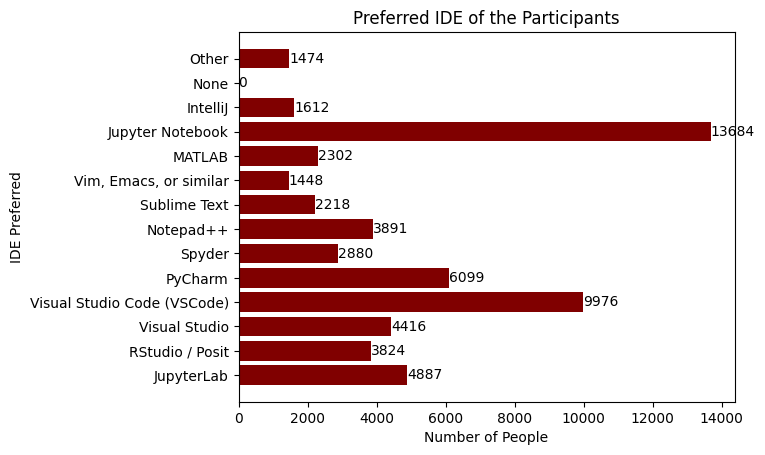

In [41]:
Q13x_vals = ['JupyterLab', 'RStudio / Posit', 'Visual Studio', 'Visual Studio Code (VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim, Emacs, or similar', 'MATLAB', 'Jupyter Notebook', 'IntelliJ', 'None', 'Other']
Q13y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q13_1'):dataset.columns.get_loc('Q14_1')]:
    Q13y_vals.append(dataset[c].sum())
q13fig, q13ax = plt.subplots()
q13bars = q13ax.barh(Q13x_vals, Q13y_vals, color='maroon')
q13ax.bar_label(q13bars)
plt.title('Preferred IDE of the Participants')
plt.ylabel('IDE Preferred')
plt.xlabel('Number of People')
plt.show()

## Usage of Hosted Notebook Products
Question: Do you use any of the following hosted notebook products? (Select all that apply)
> Answer Options:
> * Kaggle Notebooks
> * Colab Notebooks
> * Azure Notebooks
> * Code Ocean
> * IBM Watson Studio
> * Amazon Sagemaker Studio
> * Amazon Sagemaker Studio Lab
> * Amazon EMR Notebooks
> * Google Cloud Vertex AI Workbench
> * Hex Workspaces
> * Noteable Notebooks
> * Databricks Collaborative Notebooks
> * Deepnote Notebooks
> * Gradient Notebooks
> * None
> * Other


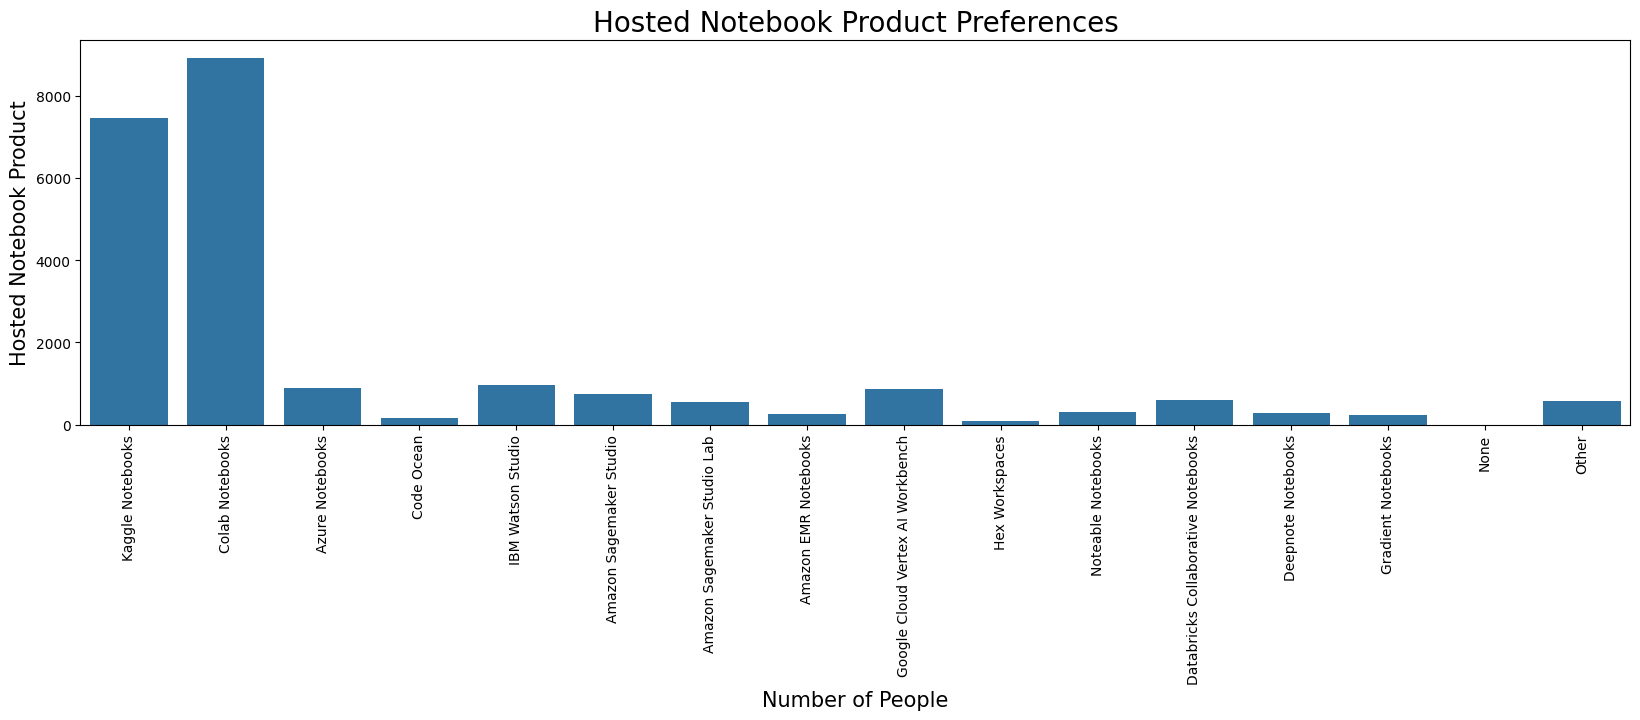

In [42]:
Q14x_vals = [ 'Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks', 'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio', 'Amazon Sagemaker Studio Lab', 'Amazon EMR Notebooks', 'Google Cloud Vertex AI Workbench', 'Hex Workspaces', 'Noteable Notebooks', 'Databricks Collaborative Notebooks', 'Deepnote Notebooks', 'Gradient Notebooks', 'None', 'Other']
Q14y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q14_1'):dataset.columns.get_loc('Q15_1')]:
    Q14y_vals.append(dataset[c].sum())
q14fig, q14ax = plt.subplots(figsize=(20, 5))
q14bars = sns.barplot(x=Q14x_vals, y=Q14y_vals)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Hosted Notebook Product Preferences', fontsize=20)
plt.ylabel('Hosted Notebook Product', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Usage of Various Data Visualization Libraries
Question: Do you use any of the following data visualization libraries on a regular basis? (Select all that apply)
> Answer Options:
> * Matplotlib
> * Seaborn
> * Plotly / Plotly Express
> * Ggplot / ggplot2
> * Shiny
> * D3 js
> * Altair
> * Bokeh
> * Geoplotlib
> * Leaflet / Folium
> * Pygal
> * Dygraphs
> * Highcharter
> * None
> * Other

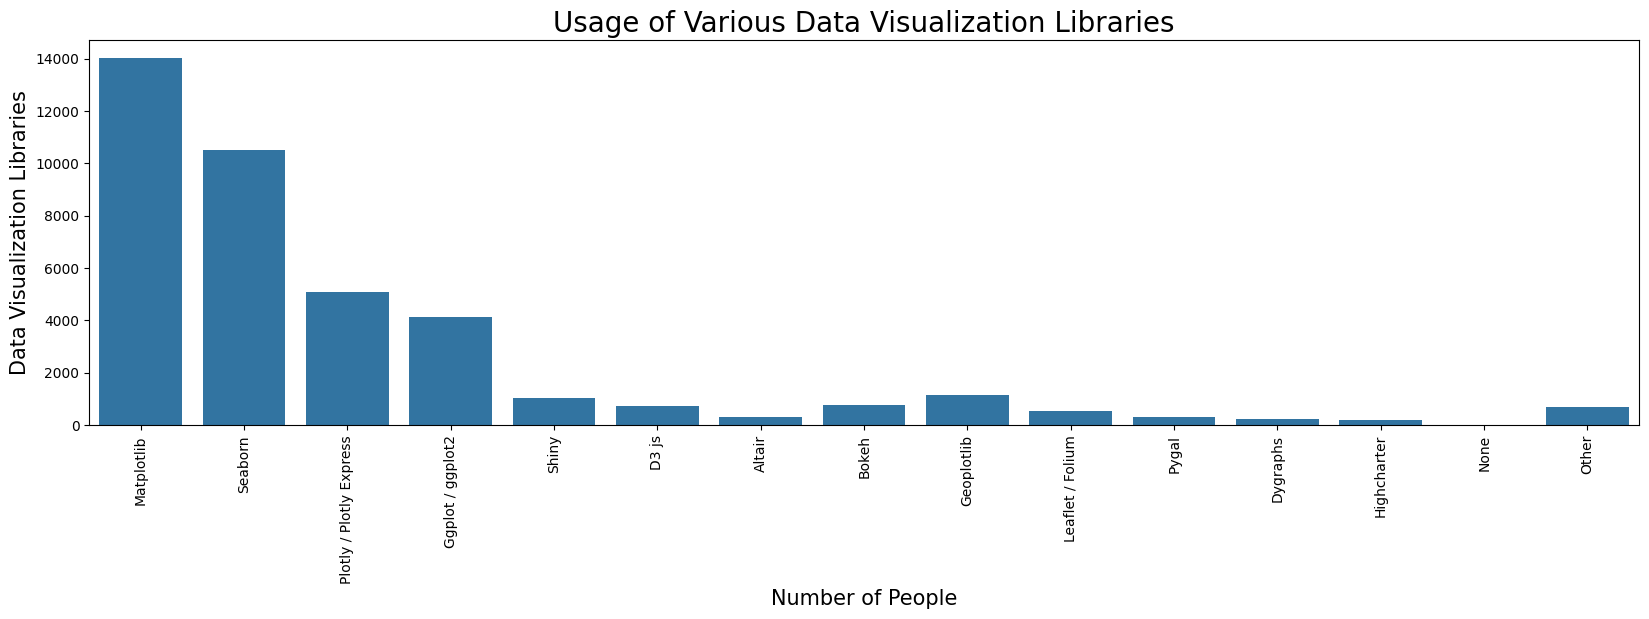

In [43]:
Q15x_vals = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'Pygal', 'Dygraphs', 'Highcharter', 'None', 'Other']
Q15y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q15_1'):dataset.columns.get_loc('Q16')]:
    Q15y_vals.append(dataset[c].sum())
q15fig, q15ax = plt.subplots(figsize=(20, 5))
q15bars = sns.barplot(x=Q15x_vals, y=Q15y_vals)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Usage of Various Data Visualization Libraries', fontsize=20)
plt.ylabel('Data Visualization Libraries', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Machine Learning Experience of Participants
Question: For how many years have you used machine learning methods?
> Answer Options:
> * I do not use machine learning methods
> * Under 1 year
> * 1-2 years
> * 2-3 years
> * 3-4 years
> * 4-5 years
> * 5-10 years
> * 10-20 years
> * 20 or more years


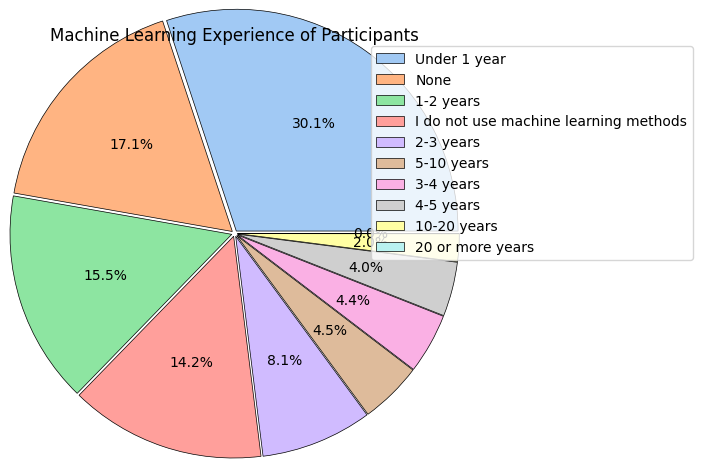

In [44]:
plt.pie(dataset['Q16'].value_counts(), autopct="%1.1f%%", colors=sns.color_palette('pastel')[:dataset['Q16'].value_counts().count()], radius=1.5, explode=[0.02 for i in range(dataset['Q16'].value_counts().count())], wedgeprops={'linewidth':0.5, "edgecolor":"k"})
plt.legend(labels=dataset['Q16'].value_counts().keys(), bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title('Machine Learning Experience of Participants')
plt.show()

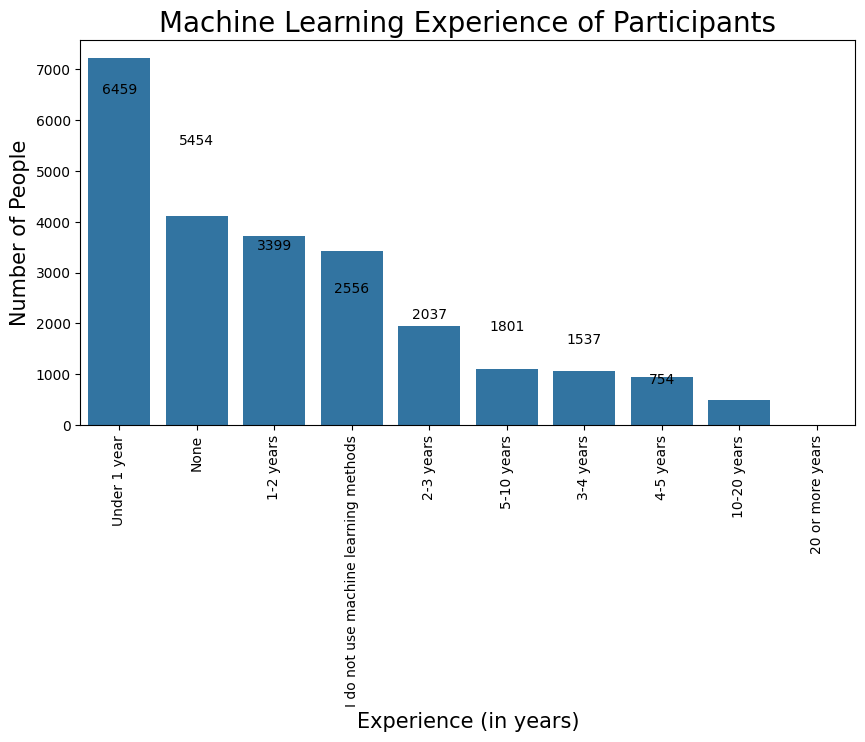

In [45]:
q16fig, q16ax = plt.subplots(figsize=(10,5))
q16barplot = sns.barplot(x=dataset['Q16'].value_counts().keys(), y=dataset['Q16'].value_counts())
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=10)
for i in ax.containers:
    q16ax.bar_label(i,)
plt.title('Machine Learning Experience of Participants', fontsize=20)
plt.xlabel('Experience (in years)', fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.show()

## Usage of Various Machine Learning Frameworks
Question: Which of the following machine learning frameworks do you use on a regular basis? (Select all that
apply)
> Answer Options:
> * Scikit-learn
> * TensorFlow
> * Keras
> * PyTorch
> * Fast.ai
> * Xgboost
> * LightGBM
> * CatBoost
> * Caret
> * Tidymodels
> * JAX
> * PyTorch Lightning
> * Huggingface
> * None
> * Other

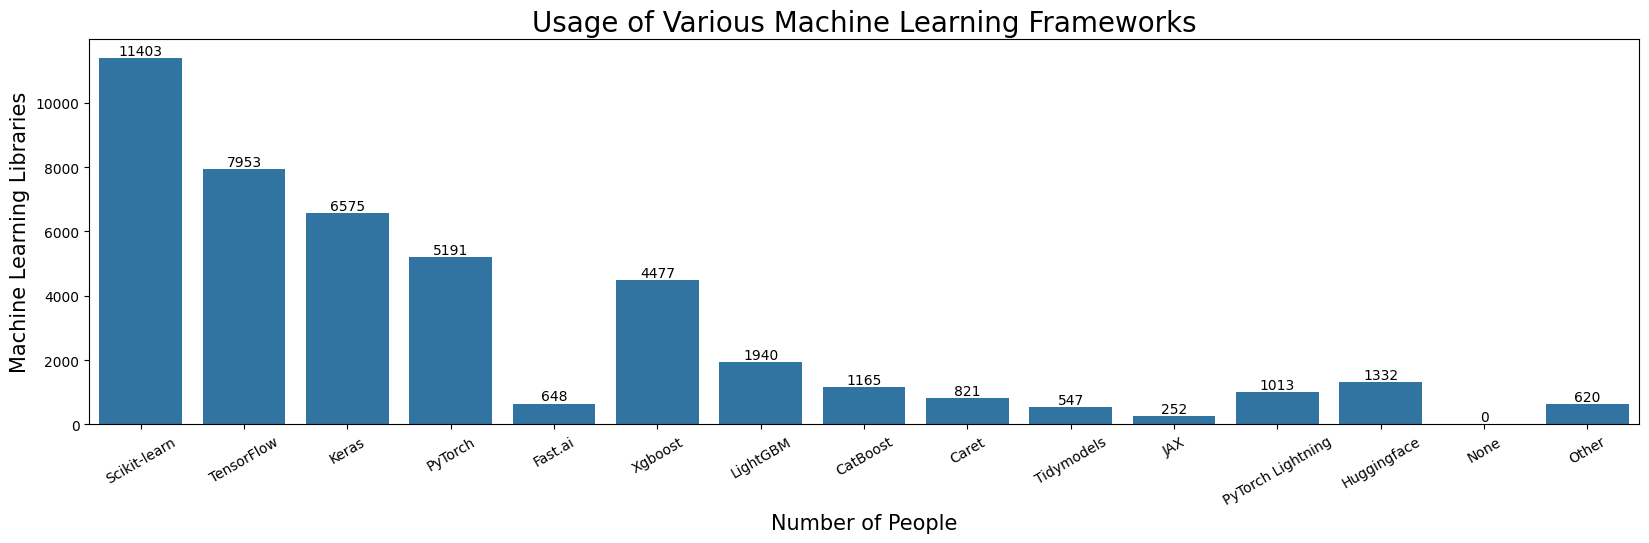

In [46]:
Q17x_vals = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'Xgboost', 'LightGBM', 'CatBoost', 'Caret', 'Tidymodels', 'JAX', 'PyTorch Lightning', 'Huggingface', 'None', 'Other']
Q17y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q17_1'):dataset.columns.get_loc('Q18_1')]:
    Q17y_vals.append(dataset[c].sum())
q17fig, q17ax = plt.subplots(figsize=(20, 5))
q17bars = sns.barplot(x=Q17x_vals, y=Q17y_vals)
for i in q17ax.containers:
    q17ax.bar_label(i,)
plt.xticks(rotation=30)
plt.title('Usage of Various Machine Learning Frameworks', fontsize=20)
plt.ylabel('Machine Learning Libraries', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Usage of Various Machine Learning Algorithms
Question: Which of the following ML algorithms do you use on a regular basis? (Select all that apply):
> Answer Options:
> * Linear or Logistic Regression
> * Decision Trees or Random Forests
> * Gradient Boosting Machines (xgboost, lightgbm, etc)
> * Bayesian Approaches
> * Evolutionary Approaches
> * Dense Neural Networks (MLPs, etc)
> * Convolutional Neural Networks
> * Generative Adversarial Networks
> * Recurrent Neural Networks
> * Transformer Networks (BERT, gpt-3, etc)
> * Autoencoder Networks (DAE, VAE, etc)
> * Graph Neural Networks
> * None
> * Other

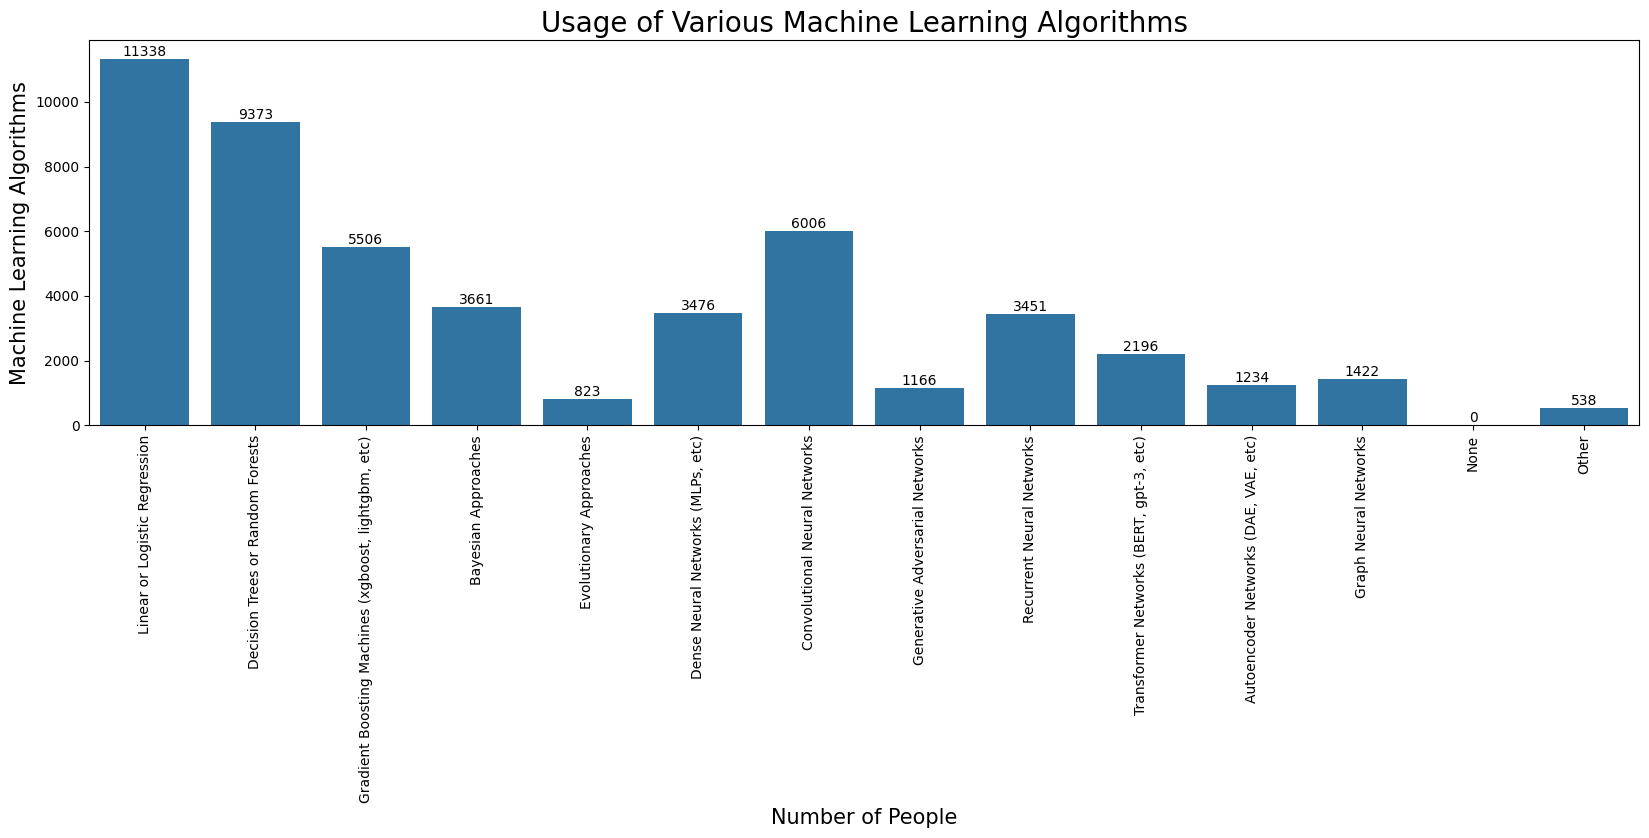

In [47]:
Q18x_vals = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 'Autoencoder Networks (DAE, VAE, etc)', 'Graph Neural Networks', 'None', 'Other']
Q18y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q18_1'):dataset.columns.get_loc('Q19_1')]:
    Q18y_vals.append(dataset[c].sum())
q18fig, q18ax = plt.subplots(figsize=(20, 5))
q18bars = sns.barplot(x=Q18x_vals, y=Q18y_vals)
for i in q18ax.containers:
    q18ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Usage of Various Machine Learning Algorithms', fontsize=20)
plt.ylabel('Machine Learning Algorithms', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Usage of Various Computer Vision Methods
Question: Which categories of computer vision methods do you use on a regular basis? (Select all that apply)
> Answer Options:
> * General purpose image/video tools (PIL, cv2, skimage, etc)
> * Image segmentation methods (U-Net, Mask R-CNN, etc)
> * Object detection methods (YOLOv6, RetinaNet, etc)
> * Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)
> * Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)
> * Generative Networks (GAN, VAE, etc)
> * None
> * Other

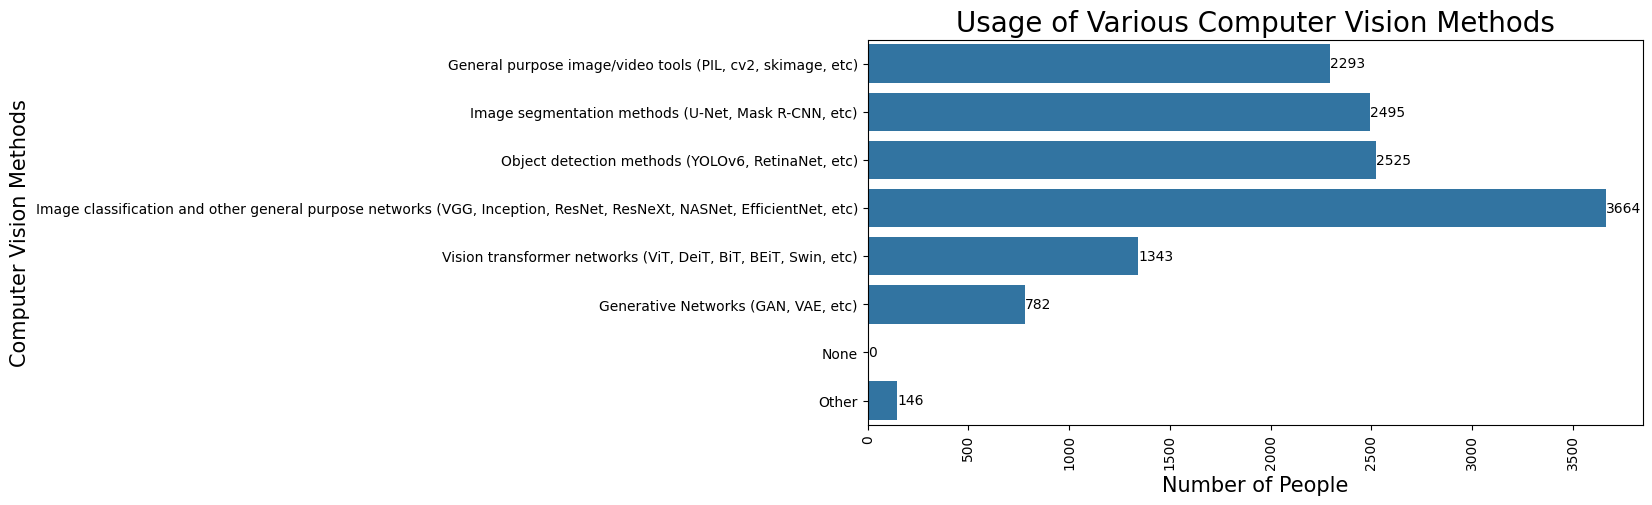

In [48]:
Q19x_vals = ['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)', 'Object detection methods (YOLOv6, RetinaNet, etc)', 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)', 'Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)', 'Generative Networks (GAN, VAE, etc)', 'None', 'Other']
Q19y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q19_1'):dataset.columns.get_loc('Q20_1')]:
    Q19y_vals.append(dataset[c].sum())
q19fig, q19ax = plt.subplots(figsize=(10, 5))
q19bars = sns.barplot(y=Q19x_vals, x=Q19y_vals)
for i in q19ax.containers:
    q19ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Usage of Various Computer Vision Methods', fontsize=20)
plt.ylabel('Computer Vision Methods', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Usage of Various Natural Language Processing (NLP) Methods
Question: Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply)
> Answer Options:
> * Word embeddings/vectors (GLoVe, fastText, word2vec)
> * Encoder-decoder models (seq2seq, vanilla transformers)
> * Contextualized embeddings (ELMo, CoVe)
> * Transformer language models (GPT-3, BERT, XLnet, etc)
> * None
> * Other

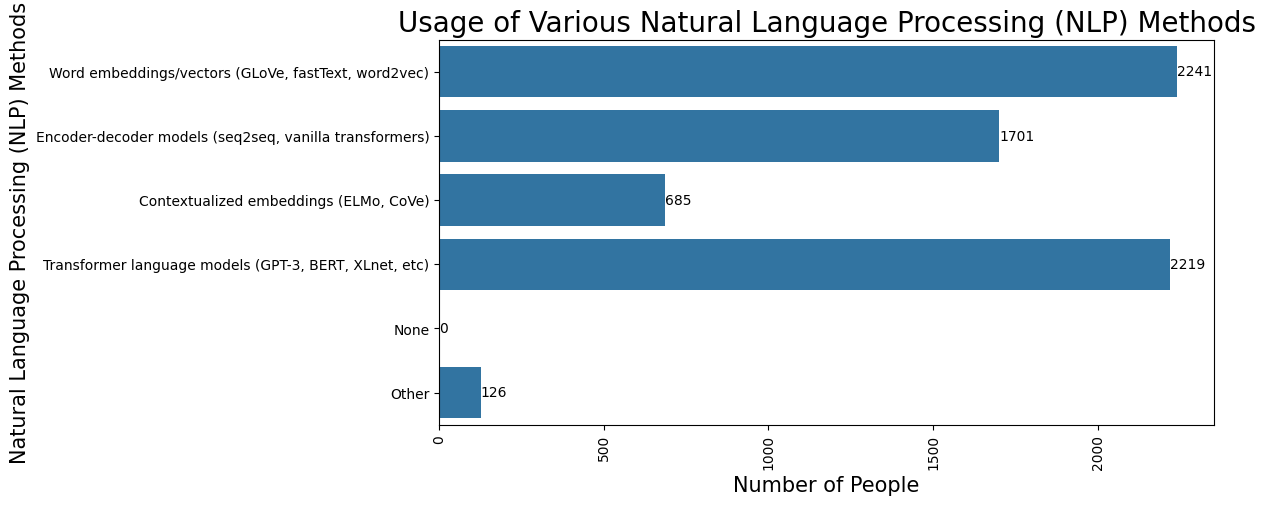

In [49]:
Q20x_vals = ['Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Encoder-decoder models (seq2seq, vanilla transformers)', 'Contextualized embeddings (ELMo, CoVe)', 'Transformer language models (GPT-3, BERT, XLnet, etc)', 'None', 'Other']
Q20y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q20_1'):dataset.columns.get_loc('Q21_1')]:
    Q20y_vals.append(dataset[c].sum())
q20fig, q20ax = plt.subplots(figsize=(10, 5))
q20bars = sns.barplot(y=Q20x_vals, x=Q20y_vals)
for i in q20ax.containers:
    q20ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Usage of Various Natural Language Processing (NLP) Methods', fontsize=20)
plt.ylabel('Natural Language Processing (NLP) Methods', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

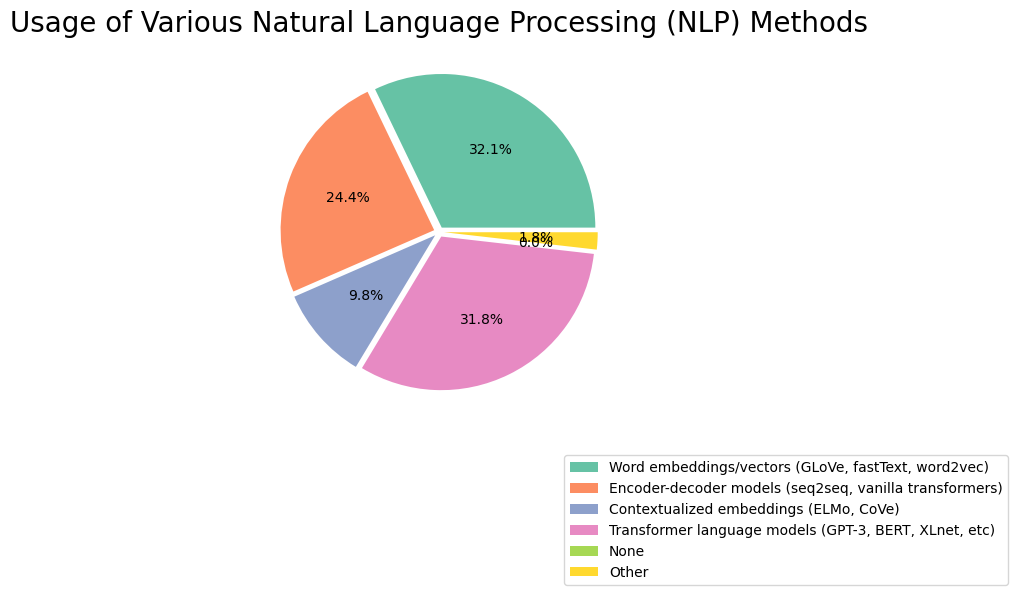

In [50]:
q20data = {}
for value in range(len(Q20x_vals)):
    q20data[Q20x_vals[value]] = Q20y_vals[value]
plt.pie(q20data.values(), radius=3, autopct="%1.1f%%", colors=sns.color_palette('Set2')[:len(Q20x_vals)], explode=[0.1 for i in range(0,len(Q20x_vals),1)])
plt.legend(labels=Q20x_vals, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.title('Usage of Various Natural Language Processing (NLP) Methods', y=2, fontdict={'fontsize': 20})
plt.subplots_adjust(top=1.3, right=0.2, left=0.0, bottom=0.2)
plt.show()

## Usage of Pre-Trained Model Weights
Question: Do you download pre-trained model weights from any of the following services? (Select all that apply)
> Answer Options:
> * Tfhub.dev
> * Pytorch hub
> * Huggingface models
> * Timm
> * Jumpstart
> * ONNX models
> * NVIDIA NGC models
> * Kaggle datasets
> * Other storage services (i.e. google drive)
> * I do not download pre-trained model weights on a regular basis

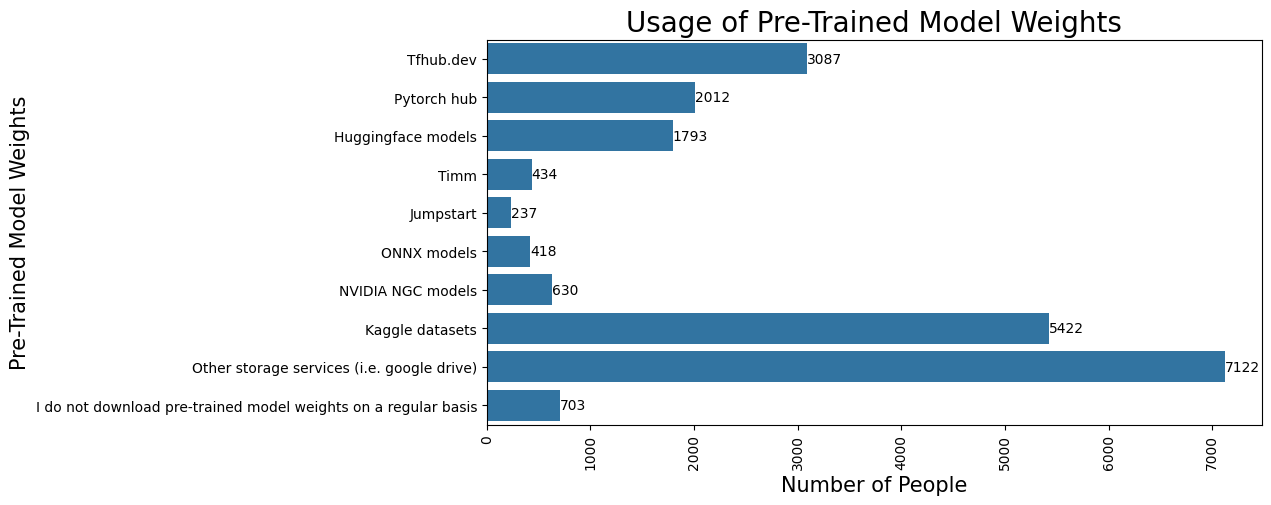

In [51]:
Q21x_vals = ['Tfhub.dev', 'Pytorch hub', 'Huggingface models', 'Timm', 'Jumpstart', 'ONNX models', 'NVIDIA NGC models', 'Kaggle datasets', 'Other storage services (i.e. google drive)', 'I do not download pre-trained model weights on a regular basis']
Q21y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q21_1'):dataset.columns.get_loc('Q22')]:
    Q21y_vals.append(dataset[c].sum())
q21fig, q21ax = plt.subplots(figsize=(10, 5))
q21bars = sns.barplot(y=Q21x_vals, x=Q21y_vals)
for i in q21ax.containers:
    q21ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Usage of Pre-Trained Model Weights', fontsize=20)
plt.ylabel('Pre-Trained Model Weights', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Usage of Various ML Model Hubs/ Repositories
Question: Which of the following ML model hubs/repositories do you use most often? (Select all that apply)
> Answer Options:
> * Tfhub.dev
> * Pytorch hub
> * Huggingface models
> * Timm
> * Jumpstart
> * ONNX models
> * NVIDIA NGC models
> * Kaggle datasets
> * Other storage services (i.e. google drive)

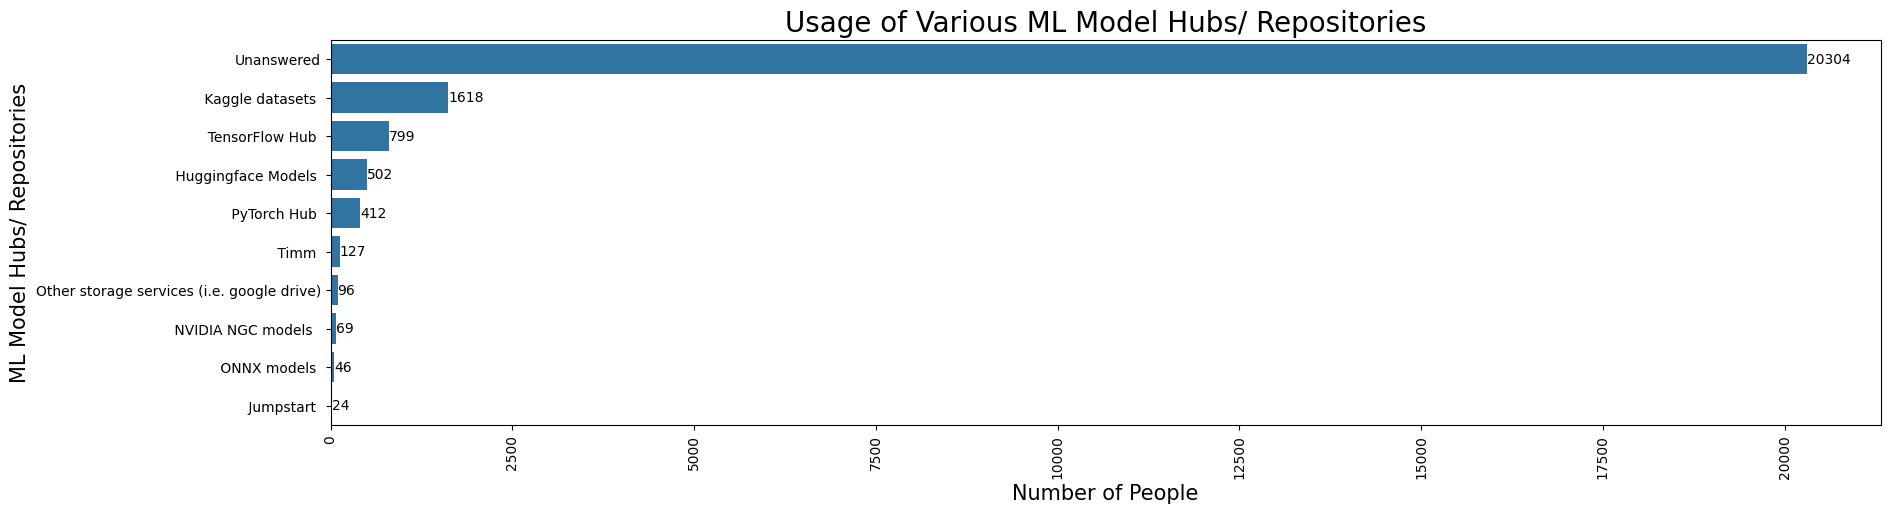

In [52]:
q22fig, q22ax = plt.subplots(figsize=(20,5))
q22barplot = sns.barplot(y=dataset['Q22'].value_counts().keys(), x=dataset['Q22'].value_counts())
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=10)
for i in q22ax.containers:
    q22ax.bar_label(i,)
# q22ax.bar_label(q22barplot)
plt.title('Usage of Various ML Model Hubs/ Repositories', fontsize=20)
plt.ylabel('ML Model Hubs/ Repositories', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Current Role of Survey Participants
Question: Select the title most similar to your current role (or most recent title if retired):
> Answer Options:
> * Data Analyst (Business, Marketing, Financial, Quantitative, etc)
> * Data Architect
> * Data Engineer
> * Data Scientist
> * Data Administrator
> * Developer Advocate
> * Machine Learning/ MLops Engineer
> * Manager (Program, Project, Operations, Executive-level, etc)
> * Research Scientist
> * Software Engineer
> * Engineer (non-software)
> * Statistician
> * Teacher / professor
> * Currently not employed
> * Other

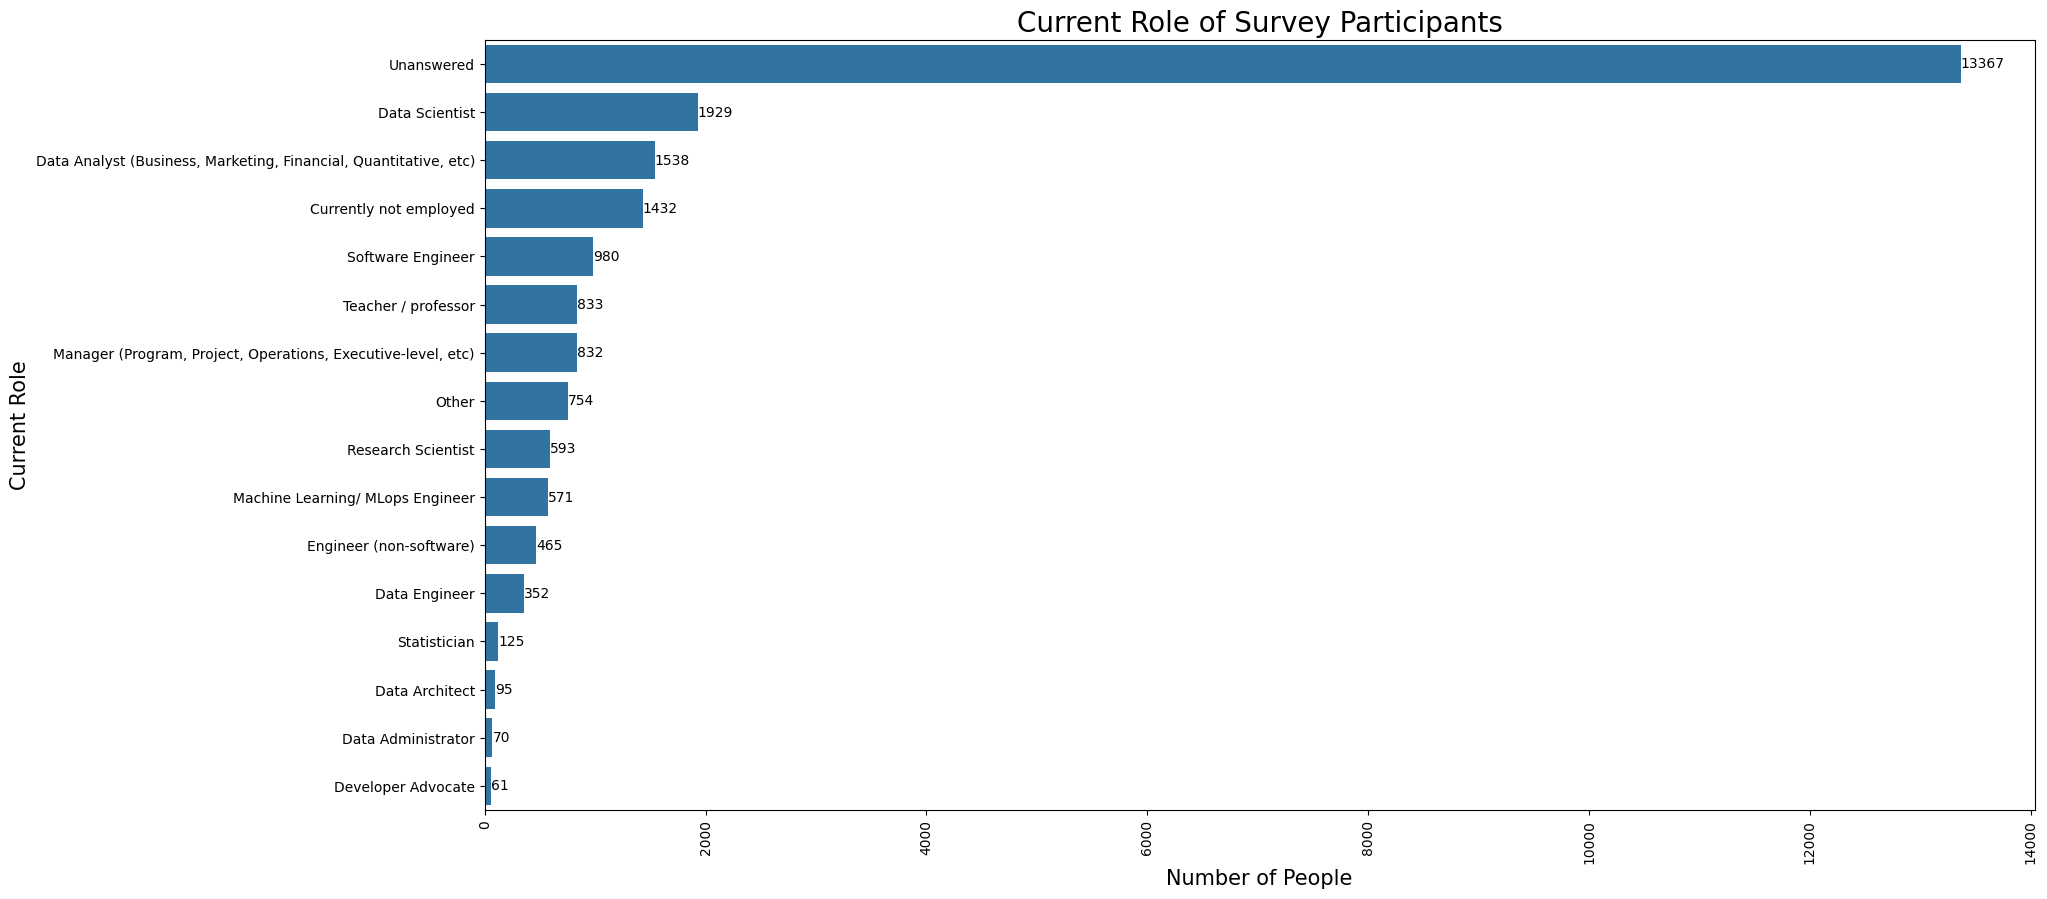

In [53]:
q23fig, q23ax = plt.subplots(figsize=(20,10))
q23barplot = sns.barplot(y=dataset['Q23'].value_counts().keys(), x=dataset['Q23'].value_counts())
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=10)
for i in q23ax.containers:
    q23ax.bar_label(i,)
plt.title('Current Role of Survey Participants', fontsize=20)
plt.ylabel('Current Role', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Industry of the Employer/ Contract
Question: In what industry is your current employer/contract (or your most recent employer if retired)?
> Answer Options:
> * Academics/Education
> * Accounting/Finance
> * Broadcasting/Communications
> * Computers/Technology
> * Energy/Mining
> * Government/Public Service
> * Insurance/Risk Assessment
> * Online Service/Internet-based Services
> * Marketing/CRM
> * Manufacturing/Fabrication
> * Medical/Pharmaceutical
> * Non-profit/Service
> * Retail/Sales
> * Shipping/Transportation
> * Other

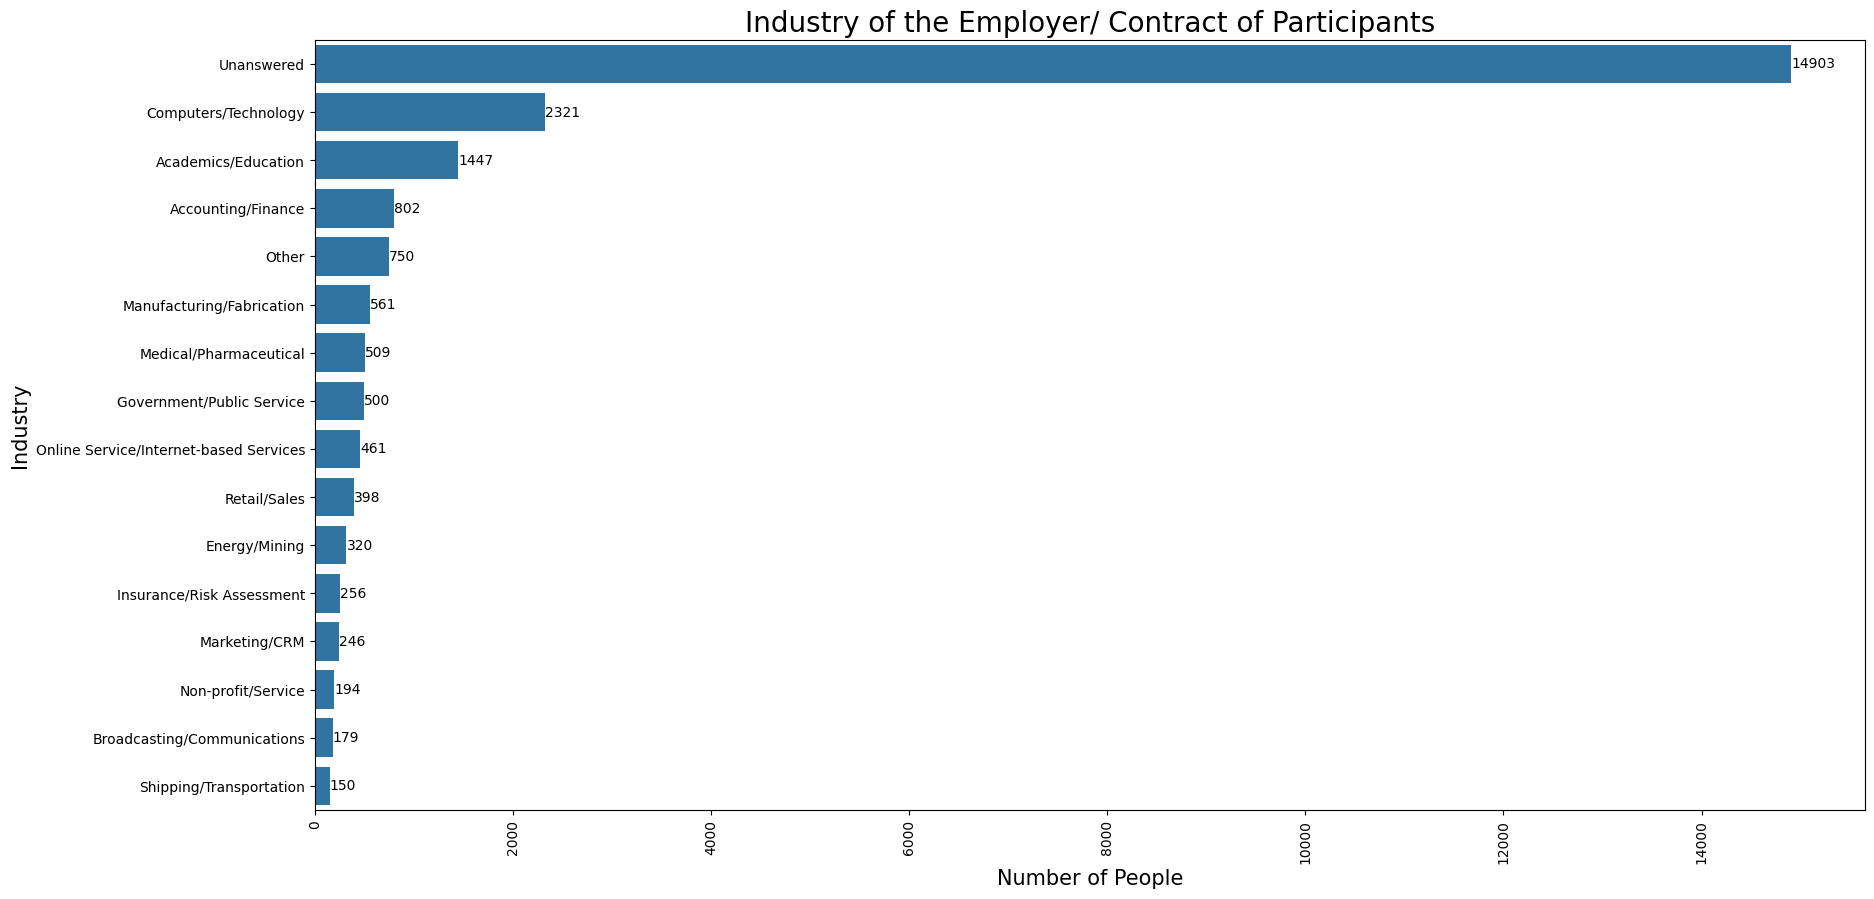

In [54]:
q24fig, q24ax = plt.subplots(figsize=(20,10))
q24barplot = sns.barplot(y=dataset['Q24'].value_counts().keys(), x=dataset['Q24'].value_counts())
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=10)
for i in q24ax.containers:
    q24ax.bar_label(i,)
plt.title('Industry of the Employer/ Contract of Participants', fontsize=20)
plt.ylabel('Industry', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Participant Company Size
Question: What is the size of the company where you are employed?
> Answer Options:
> * 0-49 employees
> * 50-249 employees
> * 250-999 employees
> * 1000-9,999 employees
> * 10,000 or more employees

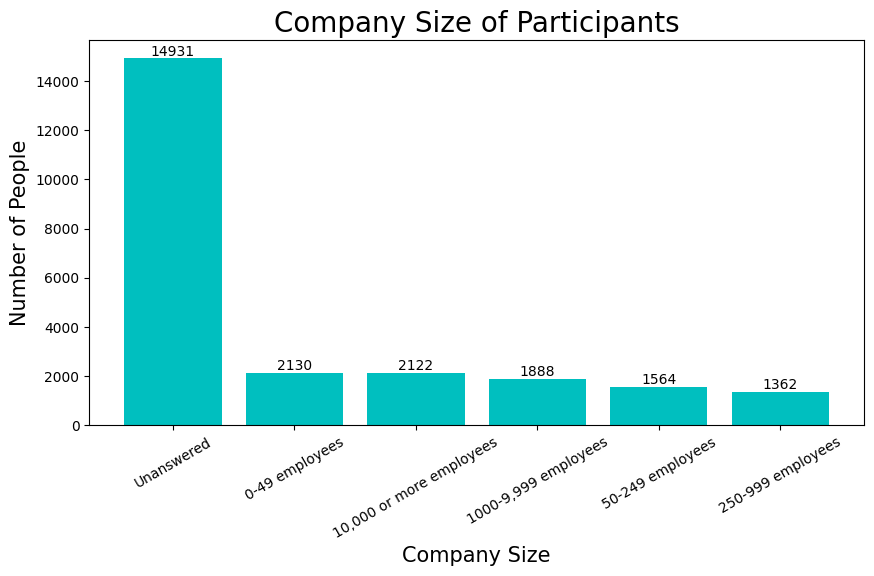

In [55]:
q25fig, q25ax = plt.subplots(figsize=(10,5))
q25barplot = plt.bar(dataset['Q25'].value_counts().keys(), dataset['Q25'].value_counts(), color='c')
plt.xticks(rotation=30)
for i in q25ax.containers:
    q25ax.bar_label(i,)
plt.title('Company Size of Participants', fontsize=20)
plt.xlabel('Company Size', fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.show()

## Incorporation of Machine Learning Methods in Businesses
Question: Does your current employer incorporate machine learning methods into their business?
> Answer Options:
> * We are exploring ML methods (and may one day put a model into production)
> * We use ML methods for generating insights (but do not put working models into production)
> * We recently started using ML methods (i.e., models in production for less than 2 years)
> * We have well established ML methods (i.e., models in production for more than 2 years)
> * No (we do not use ML methods)
> * I do not know

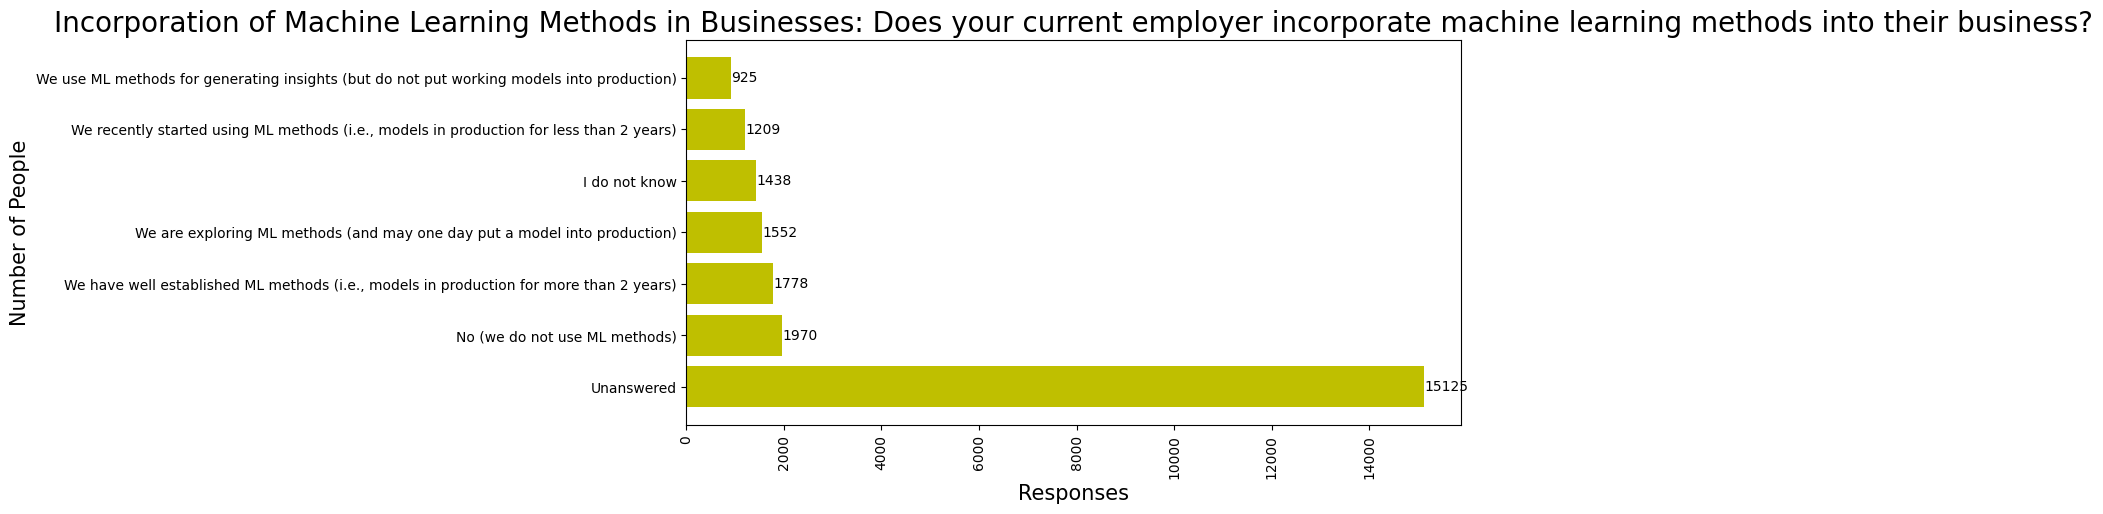

In [56]:
q27fig, q27ax = plt.subplots(figsize=(10,5))
q27barplot = plt.barh(dataset['Q27'].value_counts().keys(), dataset['Q27'].value_counts(), color='y')
plt.xticks(rotation=90)
for i in q27ax.containers:
    q27ax.bar_label(i,)
plt.title('Incorporation of Machine Learning Methods in Businesses: ' + questions['Q27'], fontsize=20)
plt.xlabel('Responses', fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.show()

## Important Activities in Participants' Job Role
Question: Select any activities that make up an important part of your role at work: (Select all that apply)
> Answer Options:
> * Analyze and understand data to influence product or business decisions
> * Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
> * Build prototypes to explore applying machine learning to new areas
> * Build and/or run a machine learning service that operationally improves my product or workflows
> * Experimentation and iteration to improve existing ML models
> * Do research that advances the state of the art of machine learning
> * None of these activities are an important part of my role at work
> * Other

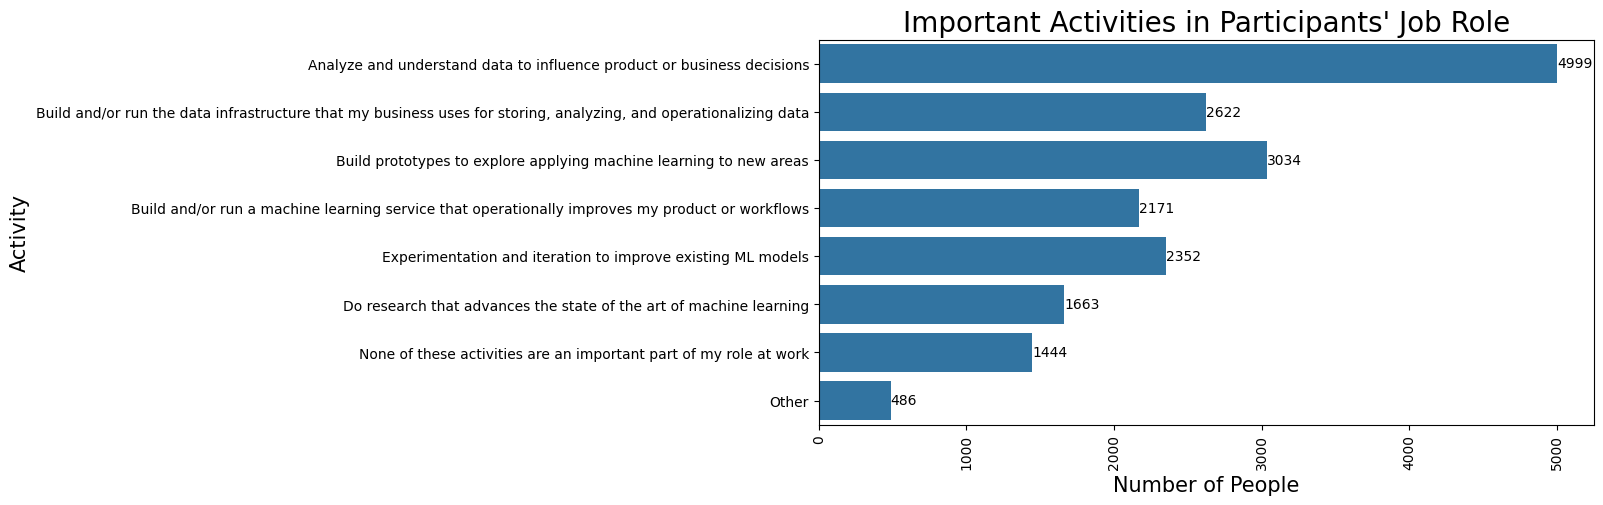

In [57]:
Q28x_vals = ['Analyze and understand data to influence product or business decisions', 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Build prototypes to explore applying machine learning to new areas', 'Build and/or run a machine learning service that operationally improves my product or workflows', 'Experimentation and iteration to improve existing ML models', 'Do research that advances the state of the art of machine learning', 'None of these activities are an important part of my role at work', 'Other']
Q28y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q28_1'):dataset.columns.get_loc('Q29')]:
    Q28y_vals.append(dataset[c].sum())
q28fig, q28ax = plt.subplots(figsize=(10, 5))
q28bars = sns.barplot(y=Q28x_vals, x=Q28y_vals)
for i in q28ax.containers:
    q28ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title("Important Activities in Participants' Job Role", fontsize=20)
plt.ylabel('Activity', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Current Yearly Compensation of Participants (in USD)
Question: What is your current yearly compensation (approximate $USD)?
> (Answer contains list of values)

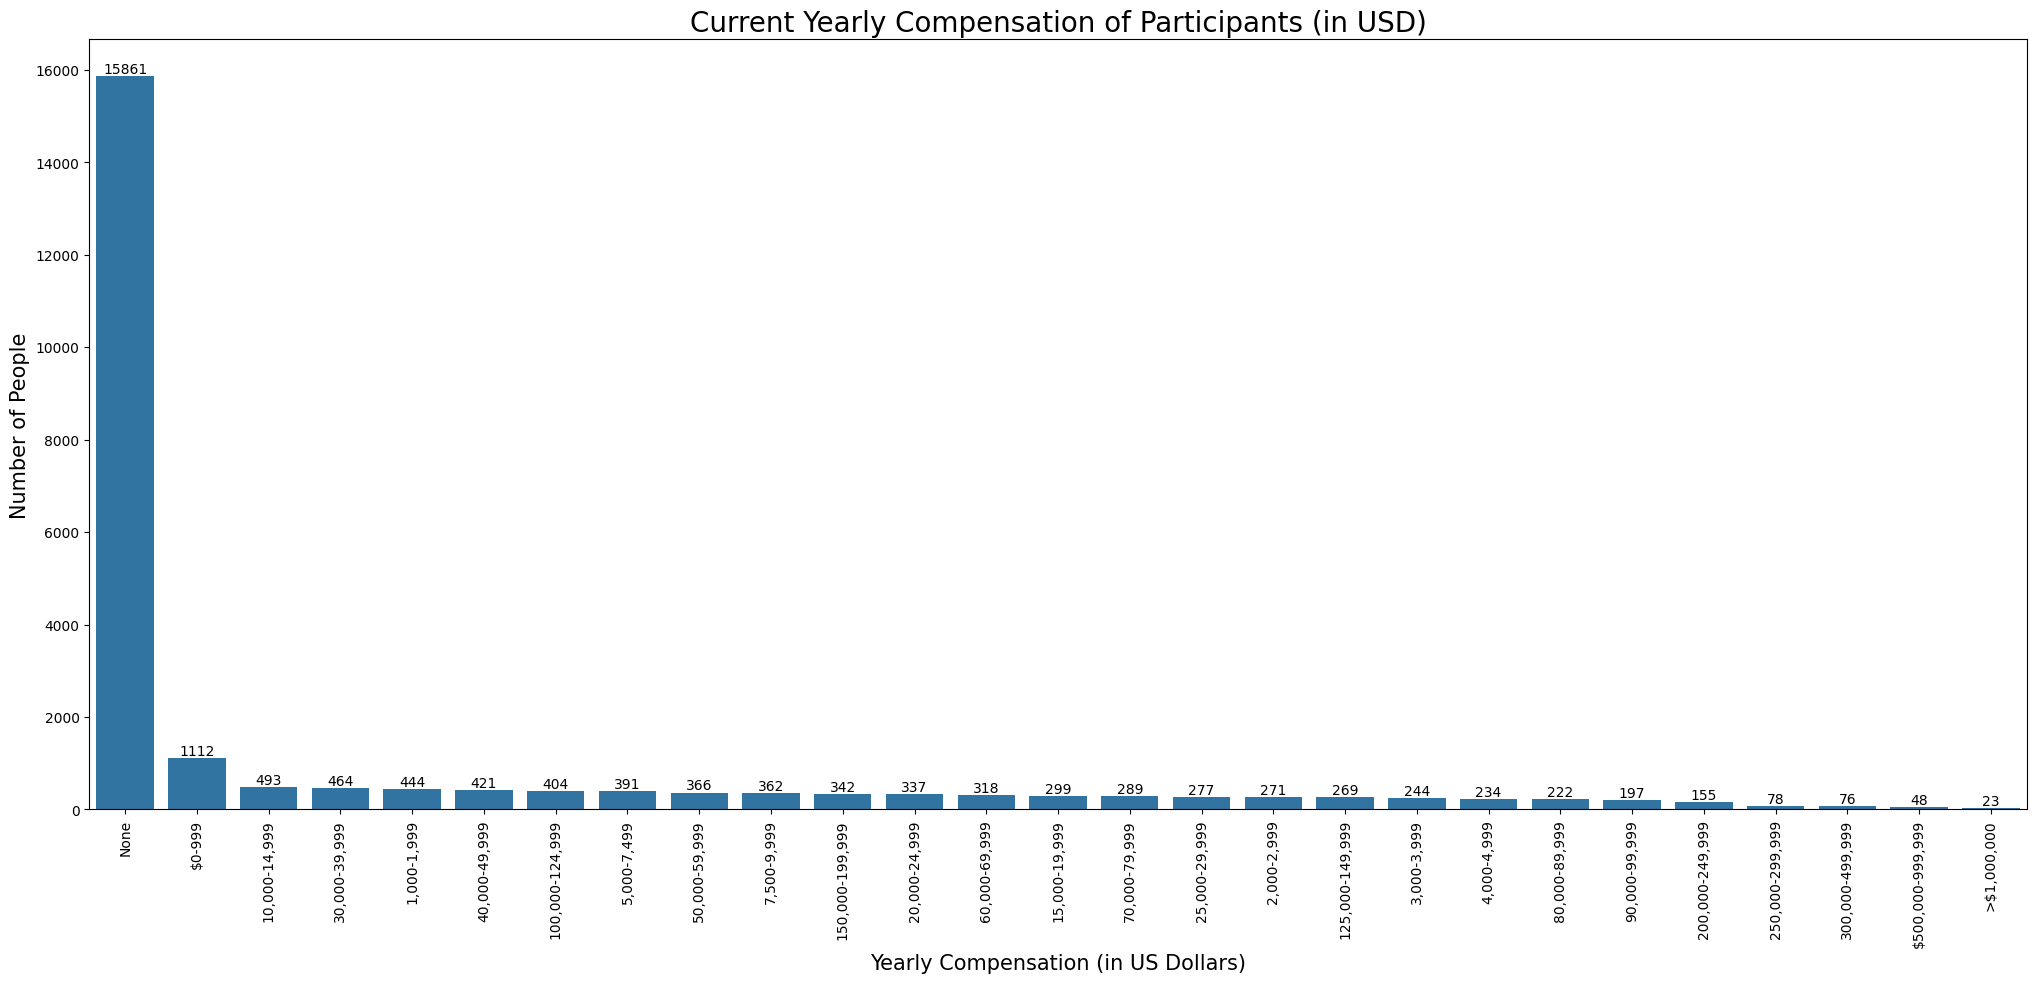

In [58]:
q29fig, q29ax = plt.subplots(figsize=(25,10))
q29barplot = sns.barplot(x=dataset['Q29'].value_counts().keys(), y=dataset['Q29'].value_counts())
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=10)
for i in q29ax.containers:
    q29ax.bar_label(i,)
    q29ax.set_alpha(0.5)
plt.title('Current Yearly Compensation of Participants (in USD)', fontsize=20)
plt.xlabel('Yearly Compensation (in US Dollars)', fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.show()

## Participant Expenditure on Machine Learning and/or Cloud Computing Services
Question: Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?
> Answer Options:
> * $0 ($USD)
> * $1-$99
> * $100-$999
> * $1000-$9,999
> * $10,000-$99,999
> * $100,000 or more ($USD)

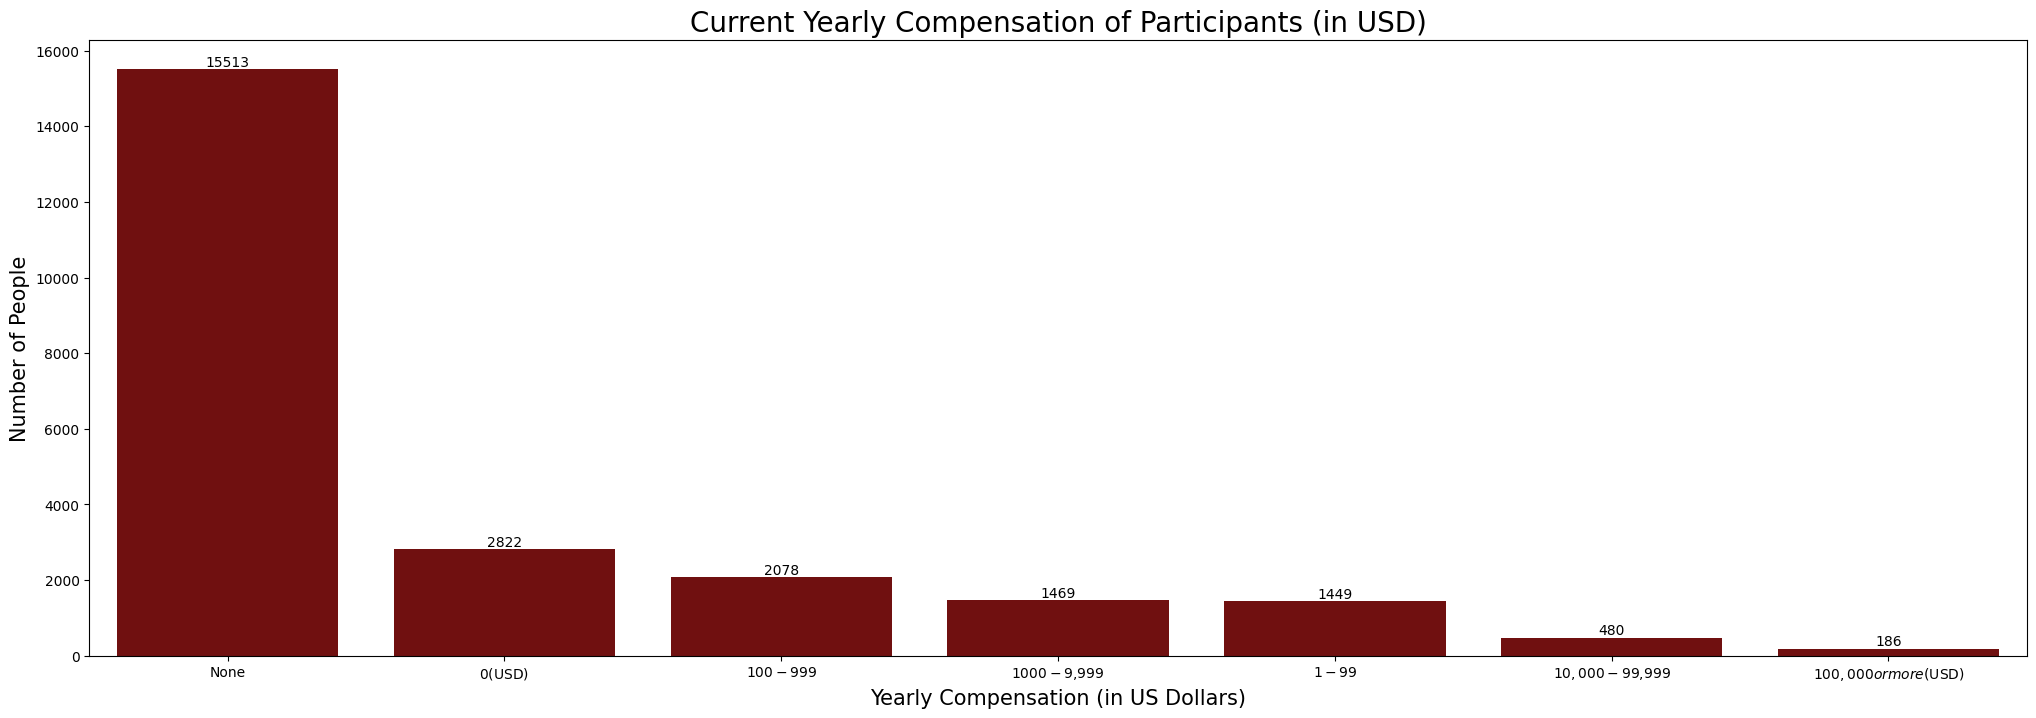

In [59]:
q30fig, q30ax = plt.subplots(figsize=(25,8))
q29barplot = sns.barplot(x=dataset['Q30'].value_counts().keys(), y=dataset['Q30'].value_counts(), color='maroon')
plt.tick_params(axis='both', which='major', labelsize=10)
for i in q30ax.containers:
    q30ax.bar_label(i,)
plt.title('Current Yearly Compensation of Participants (in USD)', fontsize=20)
plt.xlabel('Yearly Compensation (in US Dollars)', fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.show()

## Usage of Various Cloud Computing Platforms
Question: Which of the following cloud computing platforms do you use? (Select all that apply)
> Answer Options:
> * Amazon Web Services (AWS)
> * Microsoft Azure
> * Google Cloud Platform (GCP)
> * IBM Cloud / Red Hat
> * Oracle Cloud
> * SAP Cloud
> * VMware Cloud
> * Alibaba Cloud
> * Tencent Cloud
> * Huawei Cloud
> * None
> * Other

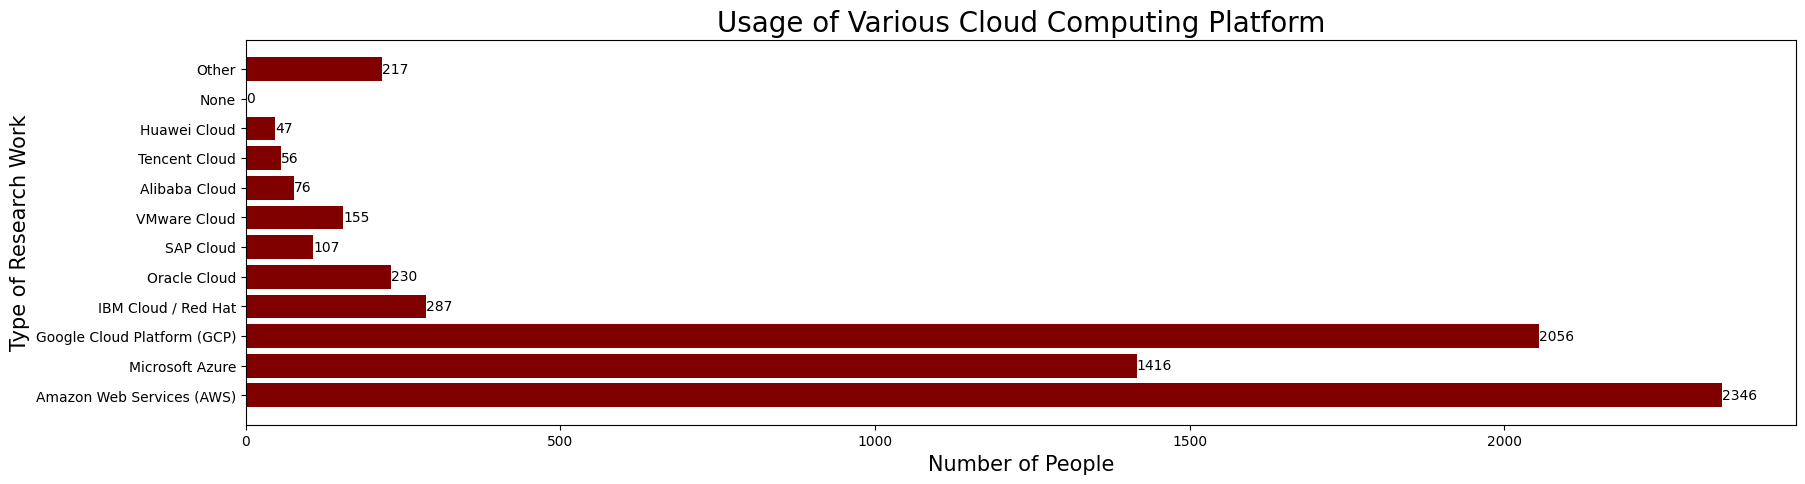

In [60]:
Q31x_vals = ['Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform (GCP)', 'IBM Cloud / Red Hat', 'Oracle Cloud', 'SAP Cloud', 'VMware Cloud', 'Alibaba Cloud', 'Tencent Cloud', 'Huawei Cloud', 'None', 'Other']
Q31y_vals = []
for c in dataset.columns[dataset.columns.get_loc('Q31_1'):dataset.columns.get_loc('Q32')]:
    Q31y_vals.append(dataset[c].sum())
q31fig, q31ax = plt.subplots(figsize=(20,5))
q31bars = q31ax.barh(Q31x_vals, Q31y_vals, color='maroon')
q31ax.bar_label(q31bars)
plt.title('Usage of Various Cloud Computing Platform', fontsize=20)
plt.ylabel('Type of Research Work', fontsize=15)
plt.xlabel('Number of People', fontsize=15)
plt.show()

## Usage of a TPU (Tensor Processing Unit)
Question: Approximately how many times have you used a TPU (tensor processing unit)?
> Answer Options:
> * Never
> * Once
> * 2-5 times
> * 6-25 times
> * More than 25 times

In [61]:
dataset['Q43'].value_counts()

Q43
Unanswered            19404
Never                  2538
2-5 times               958
Once                    612
6-25 times              260
More than 25 times      225
Name: count, dtype: int64

In [62]:
research = ['NA','No', 'Yes', 'Yes', 'Yes', 'Yes']
q10fig = px.sunburst(pd.DataFrame({'Usage':research,'Frequency':dataset['Q43'].value_counts().keys(),'Count':dataset['Q43'].value_counts().values}), path = ['Usage','Frequency','Count'], color='Usage', color_discrete_sequence=['#2A9D8F', '#E9C46A', '#264653'], template='simple_white', title='<b>Usage of a TPU (Tensor Processing Unit)</b>')
q10fig.update_layout(title_x = 0.5)
q10fig.update_traces(marker = dict(line=dict(color='#000000', width=1.6)))
q10fig.update_layout( plot_bgcolor = '#D3D3D3', paper_bgcolor = '#D3D3D3')
q10fig.show()

## **Current job roles of kagglers with respect to their age**

In [63]:
tmDataset = dataset.groupby(['Q23','Q2'],as_index=False)['Duration (in seconds)'].count()
tmDataset['Current Role'] = tmDataset['Q23']
tmDataset['Age'] = tmDataset['Q2']
tmDataset['Count'] = tmDataset['Duration (in seconds)']
fig = px.treemap(tmDataset, path=['Current Role','Age','Count'],template='simple_white',hover_name='Current Role',hover_data=['Age','Current Role','Count'],title='<b>TreeMap on Job roles of Kagglers with respect to their Age</b>')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=.5,plot_bgcolor='#FFF8DC', paper_bgcolor='#FFF8DC')
fig.show()

In [64]:
pd.set_option('display.max_columns',None)
# init_notebook_mode(connected=True)
a=dataset.groupby(['Q23','Q2'],as_index=False)['Duration (in seconds)'].count()
a['Current Role']=a['Q23']
a['Age']=a['Q2']
a['Count']=a['Duration (in seconds)']
a.drop(['Q2','Q23','Duration (in seconds)'],axis=1,inplace=True)
fig=make_subplots(rows=5,cols=3,subplot_titles=('<em>Data Administrator<em>','<em>Data Analyst ','<em>Data Engineer', '<em>Data Scientist', '<em>Engineer','<em>MLops Engineer', '<em>Research Scientist','<em>Software Engineer', '<em>Teacher / professor', '<em>Data Architect','<em>Developer Advocate','<em>Manager ','<em>Statistician','<em>Currently not employed','<em>Other'))
fig.add_trace(go.Bar(x=a[a['Current Role']=='Data Administrator']['Age'],y=a[a['Current Role']=='Data Administrator']['Count'],name='Data Administrator'),row=1,col=1)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Data Analyst (Business, Marketing, Financial, Quantitative, etc)']['Age'],y=a[a['Current Role']=='Data Analyst (Business, Marketing, Financial, Quantitative, etc)']['Count'],name='Data Analyst'),row=1,col=2)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Data Engineer']['Age'],y=a[a['Current Role']=='Data Engineer']['Count'],name='Data Engineer'),row=1,col=3)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Data Scientist']['Age'],y=a[a['Current Role']=='Data Scientist']['Count'],name='Data Scientist'),row=2,col=1)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Engineer (non-software)']['Age'],y=a[a['Current Role']=='Engineer (non-software)']['Count'],name='Engineer'),row=2,col=2)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Machine Learning/ MLops Engineer']['Age'],y=a[a['Current Role']=='Machine Learning/ MLops Engineer']['Count'],name='MLops Engineer'),row=2,col=3)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Research Scientist']['Age'],y=a[a['Current Role']=='Research Scientist']['Count'],name='Research Scientist'),row=3,col=1)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Software Engineer']['Age'],y=a[a['Current Role']=='Software Engineer']['Count'],name='Software Engineer'),row=3,col=2)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Teacher / professor']['Age'],y=a[a['Current Role']=='Teacher / professor']['Count'],name='Teacher / professor'),row=3,col=3)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Data Architect']['Age'],y=a[a['Current Role']=='Data Architect']['Count'],name='Data Architect'),row=4,col=1)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Developer Advocate']['Age'],y=a[a['Current Role']=='Developer Advocate']['Count'],name='Developer Advocate'),row=4,col=2)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Manager (Program, Project, Operations, Executive-level, etc)']['Age'],y=a[a['Current Role']=='Manager (Program, Project, Operations, Executive-level, etc)']['Count'],name='MAnager'),row=4,col=3)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Statistician']['Age'],y=a[a['Current Role']=='Statistician']['Count'],name='Statistician'),row=5,col=1)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Currently not employed']['Age'],y=a[a['Current Role']=='Currently not employed']['Count'],name='Not employed'),row=5,col=2)
fig.add_trace(go.Bar(x=a[a['Current Role']=='Other']['Age'],y=a[a['Current Role']=='Other']['Count'],name='Other'),row=5,col=3)
fig.update_layout(height=950,width=900,title_text='<i>Current job roles of kagglers with respect to their age')
fig.update_layout(template='simple_white',title_x=0.5,showlegend=False)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout( title_x=0.5,plot_bgcolor='#FFF8DC', paper_bgcolor='#FFF8DC')